# Imports

In [ ]:
!pip install -q darts dask[dataframe]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from darts import TimeSeries
from darts.datasets import AustralianTourismDataset

# Load the Data

In [ ]:
# Load the dataset
dataset = AustralianTourismDataset()
time_series = dataset.load()

# Display the time series structure and first few values
display(time_series)
display(time_series.pd_dataframe().head())

<TimeSeries (DataArray) (time: 36, component: 96, sample: 1)> Size: 28kB
array([[[84503.],
        [45906.],
        [26042.],
        ...,
        [ 6841.],
        [ 3775.],
        [  483.]],

       [[65312.],
        [29347.],
        [20676.],
        ...,
        [ 6119.],
        [ 2091.],
        [ 1431.]],

       [[72753.],
        [32492.],
        [20582.],
        ...,
...
        ...,
        [ 6987.],
        [ 2788.],
        [ 1356.]],

       [[65938.],
        [30938.],
        [19751.],
        ...,
        [ 7669.],
        [ 1433.],
        [ 2685.]],

       [[69544.],
        [31845.],
        [22758.],
        ...,
        [ 7941.],
        [ 1603.],
        [ 1765.]]])
Coordinates:
  * time       (time) int64 288B 0 1 2 3 4 5 6 7 8 ... 28 29 30 31 32 33 34 35
  * component  (component) object 768B 'Total' 'Hol' 'VFR' ... 'WA' 'TAS' 'NT'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

component    Total      Hol      VFR      Bus     Oth  NSW - hol  VIC - hol  \
time                                                                          
0          84503.0  45906.0  26042.0   9815.0  2740.0    17589.0    10412.0   
1          65312.0  29347.0  20676.0  11823.0  3466.0    11027.0     6025.0   
2          72753.0  32492.0  20582.0  13565.0  6114.0     8910.0     5060.0   
3          70880.0  31813.0  21613.0  11478.0  5976.0    10658.0     5481.0   
4          86893.0  46793.0  26947.0  10027.0  3126.0    16152.0    10958.0   

component  QLD - hol  SA - hol  WA - hol  ...  TAS - oth - noncity  \
time                                      ...                        
0             9078.0    3089.0    3449.0  ...                 24.0   
1             6310.0    1935.0    2454.0  ...                 61.0   
2            11733.0    1569.0    3398.0  ...                 23.0   
3             8109.0    2270.0    3561.0  ...                 43.0   
4            10047.0    3023.0    4287.0  ...                 60.0   

component  NT - oth - city  NT - oth - noncity      NSW      VIC      QLD  \
time                                                                        
0                     35.0                 8.0  30778.0  19020.0  17163.0   
1                     69.0                39.0  24395.0  12509.0  14275.0   
2                    150.0               338.0  21713.0  11261.0  22035.0   
3                    172.0               453.0  24326.0  12930.0  16179.0   
4                     15.0                47.0  30869.0  19190.0  19449.0   

component      SA      WA     TAS      NT  
time                                       
0          6443.0  6841.0  3775.0   483.0  
1          4492.0  6119.0  2091.0  1431.0  
2          4484.0  8191.0  1207.0  3862.0  
3          4823.0  8615.0  2103.0  1904.0  
4          5554.0  7526.0  3369.0   936.0  

[5 rows x 96 columns]

<TimeSeries (DataArray) (time: 36, component: 96, sample: 1)> Size: 28kB
array([[[84503.],
        [45906.],
        [26042.],
        ...,
        [ 6841.],
        [ 3775.],
        [  483.]],

       [[65312.],
        [29347.],
        [20676.],
        ...,
        [ 6119.],
        [ 2091.],
        [ 1431.]],

       [[72753.],
        [32492.],
        [20582.],
        ...,
...
        ...,
        [ 6987.],
        [ 2788.],
        [ 1356.]],

       [[65938.],
        [30938.],
        [19751.],
        ...,
        [ 7669.],
        [ 1433.],
        [ 2685.]],

       [[69544.],
        [31845.],
        [22758.],
        ...,
        [ 7941.],
        [ 1603.],
        [ 1765.]]])
Coordinates:
  * time       (time) int64 288B 0 1 2 3 4 5 6 7 8 ... 28 29 30 31 32 33 34 35
  * component  (component) object 768B 'Total' 'Hol' 'VFR' ... 'WA' 'TAS' 'NT'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

component    Total      Hol      VFR      Bus     Oth  NSW - hol  VIC - hol  \
time                                                                          
0          84503.0  45906.0  26042.0   9815.0  2740.0    17589.0    10412.0   
1          65312.0  29347.0  20676.0  11823.0  3466.0    11027.0     6025.0   
2          72753.0  32492.0  20582.0  13565.0  6114.0     8910.0     5060.0   
3          70880.0  31813.0  21613.0  11478.0  5976.0    10658.0     5481.0   
4          86893.0  46793.0  26947.0  10027.0  3126.0    16152.0    10958.0   

component  QLD - hol  SA - hol  WA - hol  ...  TAS - oth - noncity  \
time                                      ...                        
0             9078.0    3089.0    3449.0  ...                 24.0   
1             6310.0    1935.0    2454.0  ...                 61.0   
2            11733.0    1569.0    3398.0  ...                 23.0   
3             8109.0    2270.0    3561.0  ...                 43.0   
4            10047.0    3023.0    4287.0  ...                 60.0   

component  NT - oth - city  NT - oth - noncity      NSW      VIC      QLD  \
time                                                                        
0                     35.0                 8.0  30778.0  19020.0  17163.0   
1                     69.0                39.0  24395.0  12509.0  14275.0   
2                    150.0               338.0  21713.0  11261.0  22035.0   
3                    172.0               453.0  24326.0  12930.0  16179.0   
4                     15.0                47.0  30869.0  19190.0  19449.0   

component      SA      WA     TAS      NT  
time                                       
0          6443.0  6841.0  3775.0   483.0  
1          4492.0  6119.0  2091.0  1431.0  
2          4484.0  8191.0  1207.0  3862.0  
3          4823.0  8615.0  2103.0  1904.0  
4          5554.0  7526.0  3369.0   936.0  

[5 rows x 96 columns]

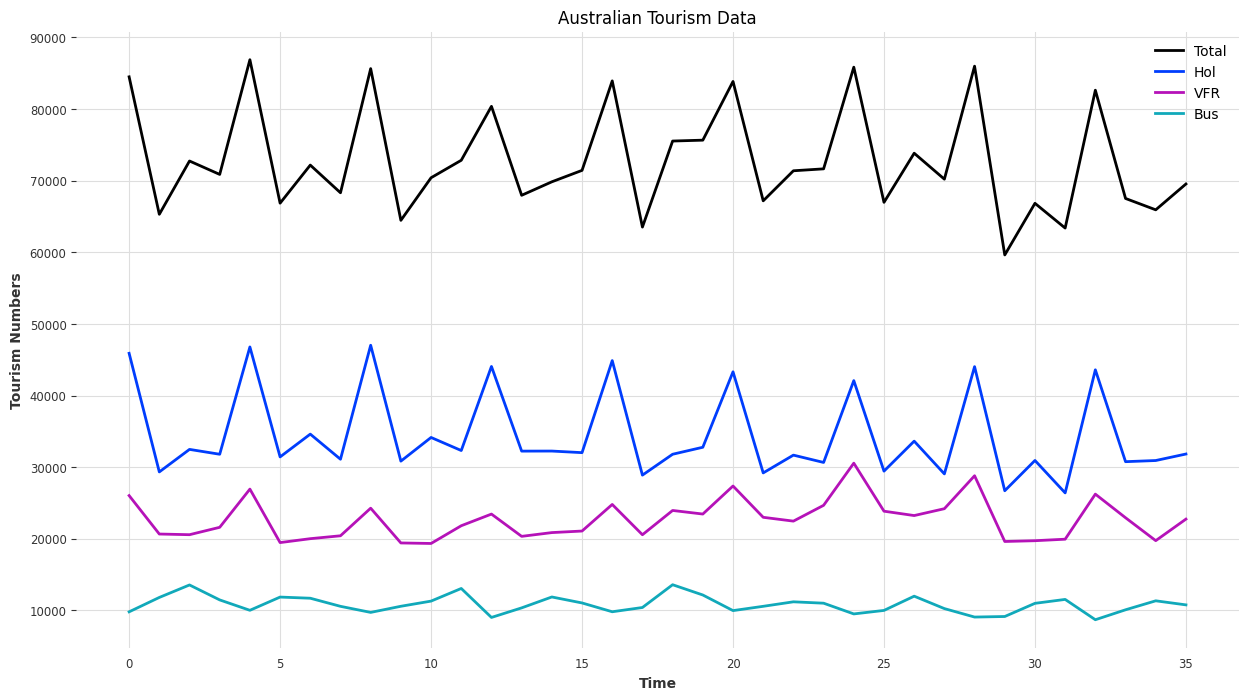

component    Total      Hol      VFR      Bus
time                                         
0          84503.0  45906.0  26042.0   9815.0
1          65312.0  29347.0  20676.0  11823.0
2          72753.0  32492.0  20582.0  13565.0
3          70880.0  31813.0  21613.0  11478.0
4          86893.0  46793.0  26947.0  10027.0
5          66866.0  31442.0  19481.0  11875.0
6          72182.0  34623.0  20026.0  11713.0
7          68318.0  31118.0  20431.0  10582.0
8          85651.0  47030.0  24284.0   9734.0
9          64467.0  30852.0  19430.0  10590.0
10         70416.0  34157.0  19358.0  11311.0
11         72855.0  32332.0  21834.0  13075.0
12         80385.0  44072.0  23461.0   9031.0
13         67967.0  32250.0  20351.0  10366.0
14         69849.0  32259.0  20876.0  11888.0
15         71445.0  32037.0  21093.0  11053.0
16         83938.0  44888.0  24805.0   9824.0
17         63529.0  28899.0  20576.0  10418.0
18         75540.0  31813.0  23966.0  13598.0
19         75663.0  32790.0  23466.0  12164.0
20         83860.0  43322.0  27380.0   9985.0
21         67193.0  29209.0  23010.0  10584.0
22         71389.0  31691.0  22477.0  11212.0
23         71658.0  30669.0  24683.0  11020.0
24         85852.0  42091.0  30568.0   9522.0
25         66981.0  29457.0  23863.0  10010.0
26         73840.0  33643.0  23254.0  11998.0
27         70217.0  29070.0  24212.0  10266.0
28         85992.0  44043.0  28811.0   9084.0
29         59637.0  26719.0  19635.0   9161.0
30         66846.0  30947.0  19743.0  11000.0
31         63392.0  26418.0  19954.0  11547.0
32         82637.0  43601.0  26245.0   8712.0
33         67523.0  30777.0  22948.0  10099.0
34         65938.0  30938.0  19751.0  11352.0
35         69544.0  31845.0  22758.0  10784.0

In [ ]:
# Function to load and display the data
def load_and_display_australian_tourism_data(plot_all_components=False, components_to_plot=None, num_components=None, return_plotted_data=False):
    """
    Loads and displays the Australian Tourism Dataset as a time series plot. The function allows the user to plot all components,
    a specific subset of components, or a specified number of components. The data corresponding to the plot can also be returned.

    Parameters:
    ----------
    plot_all_components : bool, optional
        If True, plots all components of the time series. Overrides `components_to_plot` and `num_components` if set to True. Default is False.

    components_to_plot : list of str or str, optional
        A list of component names (columns) to plot. If a single string is provided, only that component will be plotted.
        Overrides `num_components` if both are provided. Default is None.

    num_components : int, optional
        The number of components to plot, starting from the first component. If `components_to_plot` is provided,
        this parameter is ignored. Default is None.

    return_plotted_data : bool, optional
        If True, the function returns the data corresponding to the plotted components as a pandas DataFrame.
        If False, returns the entire original DataFrame without any modifications. Default is False.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing the plotted data if `return_plotted_data` is True, otherwise the original full DataFrame.

    Examples:
    --------
    # Plot the first 4 components and return the plotted data
    data = load_and_display_australian_tourism_data(num_components=4, return_plotted_data=True)

    # Plot all components
    load_and_display_australian_tourism_data(plot_all_components=True)

    # Plot a specific subset of components
    components = ['Total', 'Hol', 'VFR', 'Bus']
    load_and_display_australian_tourism_data(components_to_plot=components)
    """

    # Load the dataset
    dataset = AustralianTourismDataset()
    time_series = dataset.load()

    # Display the time series structure and first few values
    display(time_series)
    df = time_series.pd_dataframe()
    print("\n")
    display(df.head())
    print("\n")

    # Determine which components to plot
    if plot_all_components:
        components_to_plot = df.columns
    elif components_to_plot:
        components_to_plot = components_to_plot if isinstance(components_to_plot, list) else [components_to_plot]
    elif num_components:
        components_to_plot = list(df.columns[:num_components])
    else:
        components_to_plot = list(df.columns[:4])

    # Ensure components are correctly indexed
    plotted_time_series = time_series.drop_columns([col for col in time_series.columns if col not in components_to_plot])

    # Plot the time series
    plt.figure(figsize=(15, 8))
    plotted_time_series.plot()
    plt.title('Australian Tourism Data')
    plt.xlabel('Time')
    plt.ylabel('Tourism Numbers')
    plt.legend()
    plt.show()

    # Return the plotted data if requested
    if return_plotted_data:
        return plotted_time_series.pd_dataframe()
    else:
        return time_series.pd_dataframe()

# Call the function to load and display the data with default behavior
# load_and_display_australian_tourism_data()

# Call the function with all components
# load_and_display_australian_tourism_data(plot_all_components=True)

# Call the function with a specific subset of components
# components = ['Total', 'Hol', 'VFR', 'Bus', 'Oth']
# load_and_display_australian_tourism_data(components_to_plot=components)

# Call the function with a specified number of components
# load_and_display_australian_tourism_data(num_components=4)

# Call the function with a specified number of components and return the plotted data
data = load_and_display_australian_tourism_data(num_components=4, return_plotted_data=True)

# Display the returned data
display(data)

# Check the Data

In [ ]:
from darts.utils.statistics import check_seasonality

# Function to check for seasonality
def check_seasonality_for_each_component(data, max_lag=24, alpha=0.05):
    """
    Checks for seasonality in each component (column) of a multivariate time series DataFrame.

    This function converts each column of the input DataFrame into a univariate `TimeSeries` object
    and applies the `check_seasonality` function to determine if the series is seasonal and to identify
    the period of seasonality.

    Parameters:
    ----------
    data : pd.DataFrame
        A DataFrame containing the time series data. Each column represents a component (time series).

    max_lag : int, optional
        The maximum lag allowed in the Auto-correlation Function (ACF) for seasonality detection. Default is 24.

    alpha : float, optional
        The desired confidence level for the seasonality test. Default is 0.05 (5%).

    Returns:
    -------
    seasonality_results : dict
        A dictionary where keys are the column names (component names) and values are tuples (seasonal, period).
        `seasonal` is a boolean indicating whether the series is seasonal, and `period` is the detected seasonality period.

    Examples:
    --------
    # Assuming 'data' is a DataFrame containing the time series data
    seasonality_results = check_seasonality_for_each_component(data)

    # Output example:
    # Component: Total, Seasonal: True, Period: 12
    # Component: Hol, Seasonal: True, Period: 12
    # Component: VFR, Seasonal: True, Period: 12
    # Component: Bus, Seasonal: False, Period: None
    """

    seasonality_results = {}

    for column in data.columns:
        # Convert the column into a univariate TimeSeries
        ts = TimeSeries.from_dataframe(data[[column]])

        # Check seasonality for the current time series
        seasonal, period = check_seasonality(ts, max_lag=max_lag, alpha=alpha)

        # Store the result
        seasonality_results[column] = (seasonal, period)
        print(f"Component: {column}, Seasonal: {seasonal}, Period: {period}")

    return seasonality_results

# Use the function
seasonality_results = check_seasonality_for_each_component(data)

Component: Total, Seasonal: True, Period: 4
Component: Hol, Seasonal: True, Period: 4
Component: VFR, Seasonal: True, Period: 4
Component: Bus, Seasonal: True, Period: 4



Component: Total, Trend and Seasonality extracted.


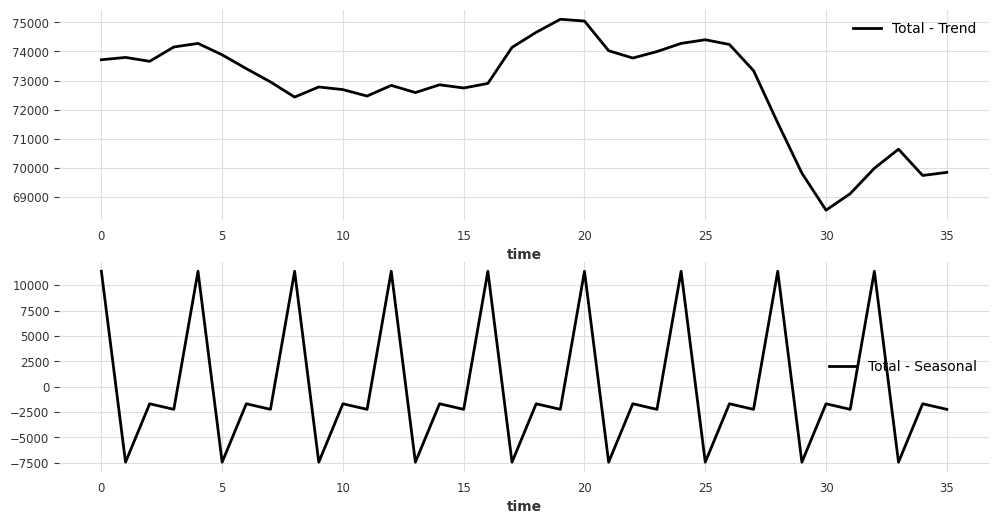


Component: Hol, Trend and Seasonality extracted.


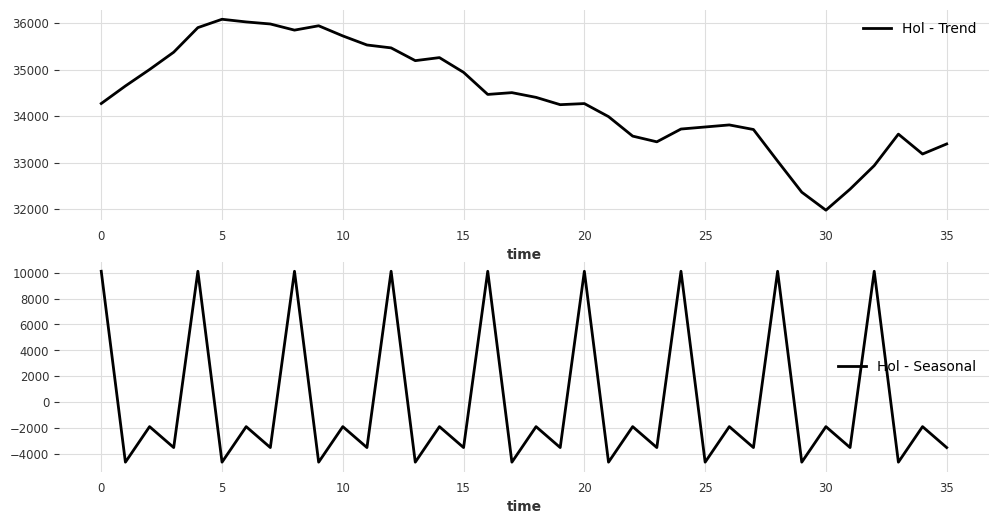


Component: VFR, Trend and Seasonality extracted.



Component: Bus, Trend and Seasonality extracted.


In [ ]:
from darts.utils.statistics import extract_trend_and_seasonality, ModelMode

# Function to extract the trend and seasonality
def extract_trend_and_seasonality_for_each_component(data, freq=None, model='mult', method='naive', plot_components=False, **kwargs):
    """
    Extracts the trend and seasonality components from each univariate time series (column) in the provided DataFrame.

    The function decomposes each time series into trend and seasonal components using the `extract_trend_and_seasonality()` function from `darts`.

    Parameters:
    ----------
    data : pd.DataFrame
        A DataFrame containing the time series data. Each column represents a component (time series).

    freq : Union[int, Sequence[int], None], optional
        The seasonality period to use. If None, the period will be inferred. Default is None.

    model : str, optional
        The type of decomposition to use. Can be 'add' for additive or 'mult' for multiplicative. Default is 'mult'.

    method : str, optional
        The method to be used for the decomposition. Options are "naive", "STL", "MSTL". Default is "naive".

    plot_components : bool, optional
        If True, the trend and seasonal components for each time series will be plotted. Default is False.

    **kwargs : dict
        Additional keyword arguments to pass to the `extract_trend_and_seasonality()` function.

    Returns:
    -------
    trend_seasonality_results : dict
        A dictionary where keys are the column names (component names) and values are tuples `(trend, seasonal)`.
        `trend` and `seasonal` are `TimeSeries` objects representing the decomposed trend and seasonal components.

    Examples:
    --------
    # Assuming 'data' is a DataFrame containing the time series data
    trend_seasonality_results = extract_trend_and_seasonality_for_each_component(data, freq=12, model='add', plot_components=True)
    """

    # Map the string model to the corresponding ModelMode
    if model == 'add':
        model_mode = ModelMode.ADDITIVE
    elif model == 'mult':
        model_mode = ModelMode.MULTIPLICATIVE
    else:
        raise ValueError("Invalid model type. Use 'add' for additive or 'mult' for multiplicative.")

    trend_seasonality_results = {}

    for column in data.columns:
        # Convert the column into a univariate TimeSeries
        ts = TimeSeries.from_dataframe(data[[column]])

        # Extract trend and seasonality for the current time series
        trend, seasonal = extract_trend_and_seasonality(ts, freq=freq, model=model_mode, method=method, **kwargs)

        # Store the result
        trend_seasonality_results[column] = (trend, seasonal)
        print(f"\nComponent: {column}, Trend and Seasonality extracted.")

        # Plot the trend and seasonality components if requested
        if plot_components:
            plt.figure(figsize=(12, 6))
            plt.subplot(2, 1, 1)
            trend.plot(label=f"{column} - Trend")
            plt.legend()
            plt.subplot(2, 1, 2)
            seasonal.plot(label=f"{column} - Seasonal")
            plt.legend()
            plt.show()

    return trend_seasonality_results

# Use the function
trend_seasonality_results = extract_trend_and_seasonality_for_each_component(data, freq=4, model='add', plot_components=True)


Plotting ACF for Component: Total


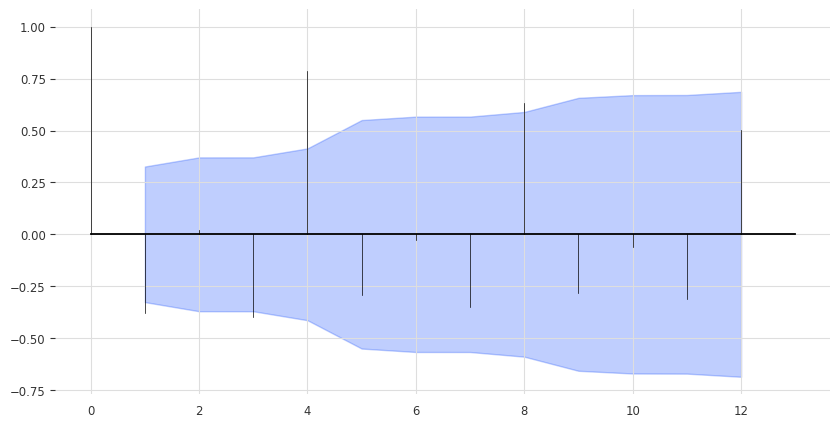


Plotting ACF for Component: Hol



Plotting ACF for Component: VFR


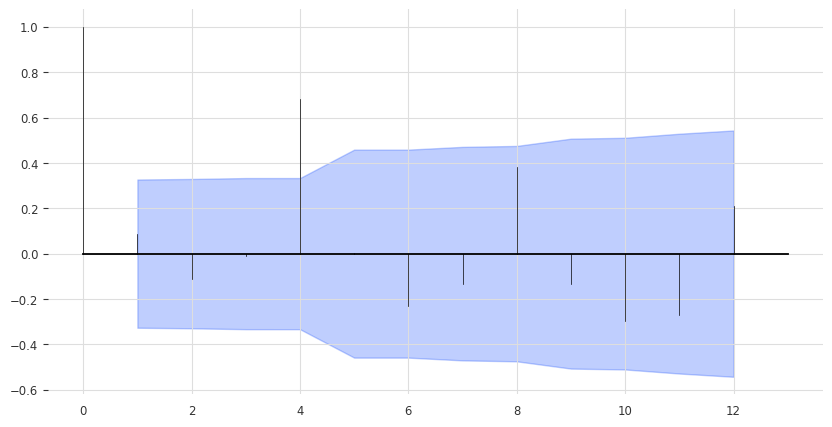


Plotting ACF for Component: Bus


In [ ]:
from darts.utils.statistics import plot_acf

# Function to plot ACF
def plot_acf_for_each_component(data, m=None, max_lag=12, alpha=0.05, bartlett_confint=True, fig_size=(10, 5), default_formatting=True):
    """
    Plots the Autocorrelation Function (ACF) for each univariate time series (column) in the provided DataFrame.

    Parameters:
    ----------
    data : pd.DataFrame
        A DataFrame containing the time series data. Each column represents a component (time series).

    m : int, optional
        Optionally, a time lag to highlight on the plot. Default is None.

    max_lag : int, optional
        The maximal lag order to consider in the ACF plot. Default is 24.

    alpha : float, optional
        The confidence interval to display. Default is 0.05 (5%).

    bartlett_confint : bool, optional
        Whether the confidence interval should be calculated using Bartlett’s formula. Default is True.

    fig_size : Tuple[int, int], optional
        The size of the figure to be displayed. Default is (10, 5).

    default_formatting : bool, optional
        Whether to use the darts default scheme. Default is True.

    Returns:
    -------
    None

    Examples:
    --------
    # Assuming 'data' is a DataFrame containing the time series data
    plot_acf_for_each_component(data)
    """

    for column in data.columns:
        # Convert the column into a univariate TimeSeries
        ts = TimeSeries.from_dataframe(data[[column]])

        # Plot ACF for the current time series
        print(f"\nPlotting ACF for Component: {column}")
        plot_acf(ts, m=m, max_lag=max_lag, alpha=alpha, bartlett_confint=bartlett_confint, fig_size=fig_size, default_formatting=default_formatting)
        plt.show()

# Use the function
plot_acf_for_each_component(data)


Plotting PACF for Component: Total


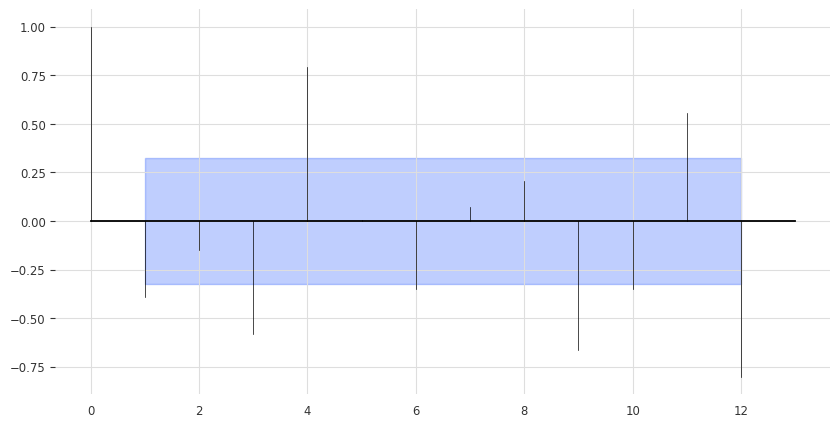


Plotting PACF for Component: Hol



Plotting PACF for Component: VFR


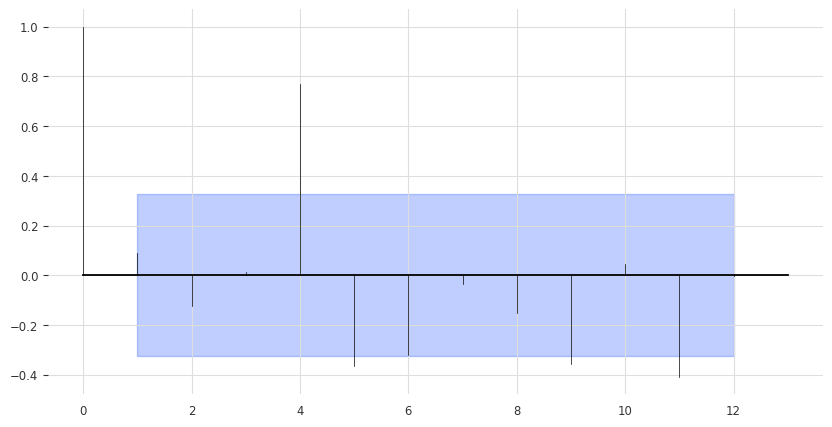


Plotting PACF for Component: Bus


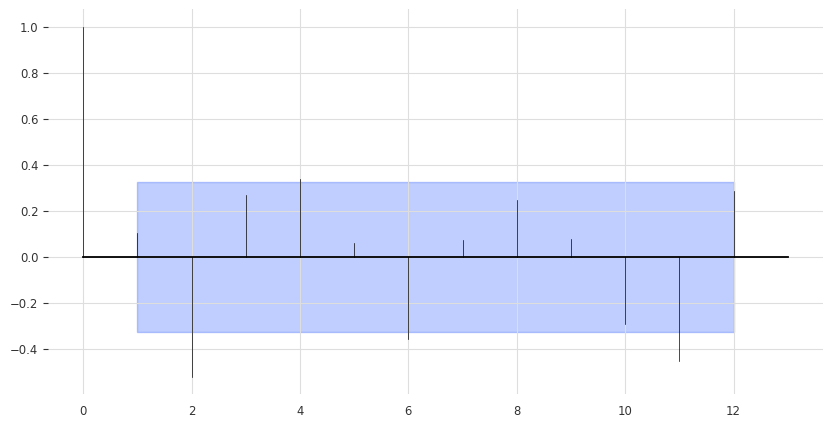

In [ ]:
from darts.utils.statistics import plot_pacf

# Function to plot PACF
def plot_pacf_for_each_component(data, m=None, max_lag=12, method='ywadjusted', alpha=0.05, fig_size=(10, 5), default_formatting=True):
    """
    Plots the Partial Autocorrelation Function (PACF) for each univariate time series (column) in the provided DataFrame.

    Parameters:
    ----------
    data : pd.DataFrame
        A DataFrame containing the time series data. Each column represents a component (time series).

    m : int, optional
        Optionally, a time lag to highlight on the plot. Default is None.

    max_lag : int, optional
        The maximal lag order to consider in the PACF plot. Default is 24.

    method : str, optional
        The method to be used for the PACF calculation. Options are "ywadjusted" (default), "yw", "ywmle", "ols", "ols-inefficient", "ols-adjusted", "ld", "ldb".

    alpha : float, optional
        The confidence interval to display. Default is 0.05 (5%).

    fig_size : Tuple[int, int], optional
        The size of the figure to be displayed. Default is (10, 5).

    default_formatting : bool, optional
        Whether to use the darts default scheme. Default is True.

    Returns:
    -------
    None

    Examples:
    --------
    # Assuming 'data' is a DataFrame containing the time series data
    plot_pacf_for_each_component(data)
    """

    for column in data.columns:
        # Convert the column into a univariate TimeSeries
        ts = TimeSeries.from_dataframe(data[[column]])

        # Plot PACF for the current time series
        print(f"\nPlotting PACF for Component: {column}")
        plot_pacf(ts, m=m, max_lag=max_lag, method=method, alpha=alpha, fig_size=fig_size, default_formatting=default_formatting)
        plt.show()

# Use the function
plot_pacf_for_each_component(data)


Plotting CCF between 'Total' and 'Hol'


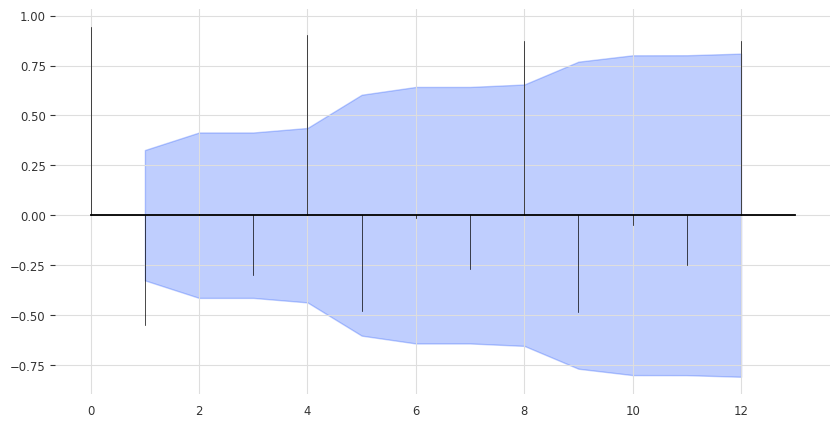

In [ ]:
from darts.utils.statistics import plot_ccf

# Function to plot CCF
def plot_ccf_for_components(data, target_column, other_column, m=None, max_lag=12, alpha=0.05, bartlett_confint=True, fig_size=(10, 5), default_formatting=True):
    """
    Plots the Cross Correlation Function (CCF) between a target time series and another time series in the provided DataFrame.

    Parameters:
    ----------
    data : pd.DataFrame
        A DataFrame containing the time series data. Each column represents a component (time series).

    target_column : str
        The name of the column to use as the target time series (ts).

    other_column : str
        The name of the column to use as the other time series (ts_other).

    m : int, optional
        Optionally, a time lag to highlight on the plot. Default is None.

    max_lag : int, optional
        The maximal lag order to consider in the CCF plot. Default is 24.

    alpha : float, optional
        The confidence interval to display. Default is 0.05 (5%).

    bartlett_confint : bool, optional
        Whether the confidence interval should be calculated using Bartlett’s formula. Default is True.

    fig_size : Tuple[int, int], optional
        The size of the figure to be displayed. Default is (10, 5).

    default_formatting : bool, optional
        Whether to use the darts default scheme. Default is True.

    Returns:
    -------
    None

    Examples:
    --------
    # Assuming 'data' is a DataFrame containing the time series data
    plot_ccf_for_components(data, target_column='Total', other_column='Hol')
    """

    # Convert the target and other columns into univariate TimeSeries objects
    ts_target = TimeSeries.from_dataframe(data[[target_column]])
    ts_other = TimeSeries.from_dataframe(data[[other_column]])

    # Plot CCF between the target and other time series
    print(f"\nPlotting CCF between '{target_column}' and '{other_column}'")
    plot_ccf(ts_target, ts_other, m=m, max_lag=max_lag, alpha=alpha, bartlett_confint=bartlett_confint, fig_size=fig_size, default_formatting=default_formatting)
    plt.show()

# Use the function
plot_ccf_for_components(data, target_column='Total', other_column='Hol')


Plotting histogram for Component: Total


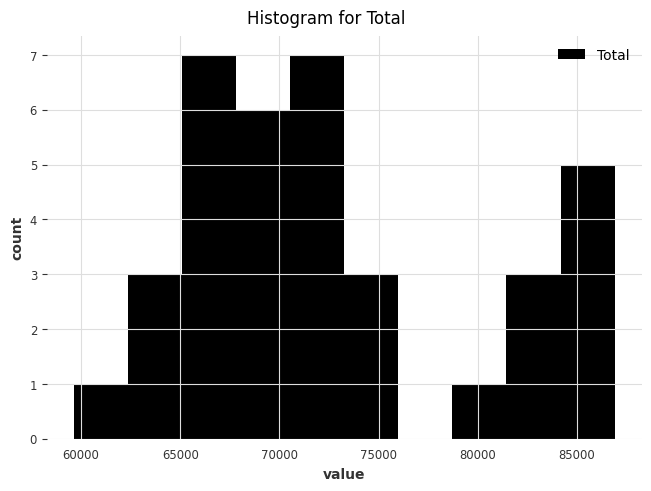


Plotting histogram for Component: Hol



Plotting histogram for Component: VFR


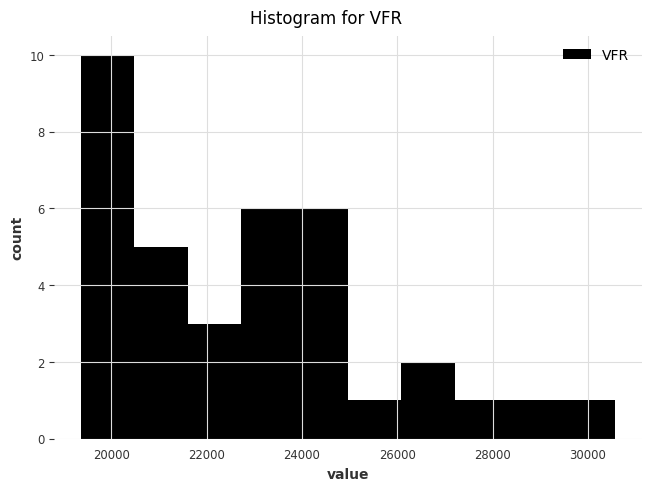


Plotting histogram for Component: Bus


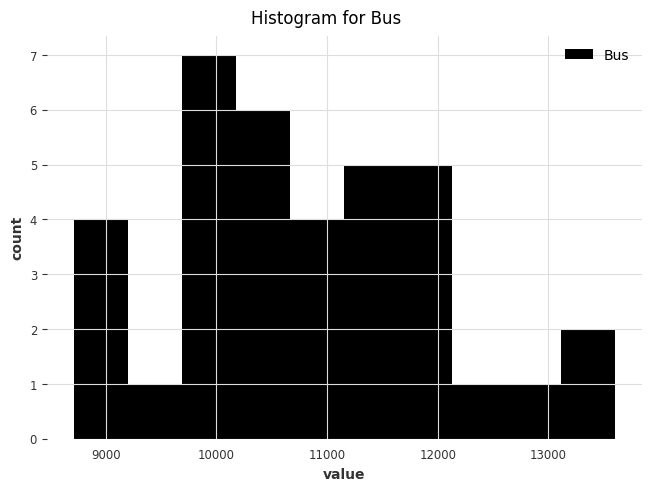

In [ ]:
from darts.utils.statistics import plot_hist

# Function to plot histogram
def plot_hist_for_each_component(data, bins=None, density=False, title=None, fig_size=None, ax=None):
    """
    Plots the histogram of values for each univariate time series (column) in the provided DataFrame.

    Parameters:
    ----------
    data : pd.DataFrame
        A DataFrame containing the time series data. Each column represents a component (time series).

    bins : Union[int, ndarray, List[float], None], optional
        Optionally, either an integer value for the number of bins to be displayed or an array-like of floats determining the position of bins.

    density : bool, optional
        If density is set to True, the bin counts will be converted to probability density. Default is False.

    title : str, optional
        The title of the figure to be displayed. Default is None.

    fig_size : Tuple[int, int], optional
        The size of the figure to be displayed. Default is None.

    ax : axis, optional
        Optionally, an axis object to plot the histogram on. Default is None.

    Returns:
    -------
    None

    Examples:
    --------
    # Assuming 'data' is a DataFrame containing the time series data
    plot_hist_for_each_component(data)
    """

    for column in data.columns:
        # Convert the column into a univariate TimeSeries
        ts = TimeSeries.from_dataframe(data[[column]])

        # Plot histogram for the current time series
        print(f"\nPlotting histogram for Component: {column}")
        plot_hist(ts, bins=bins, density=density, title=f"Histogram for {column}" if title is None else title, fig_size=fig_size, ax=ax)
        plt.show()

# Use the function
plot_hist_for_each_component(data)


Component: Total, Seasonality removed.


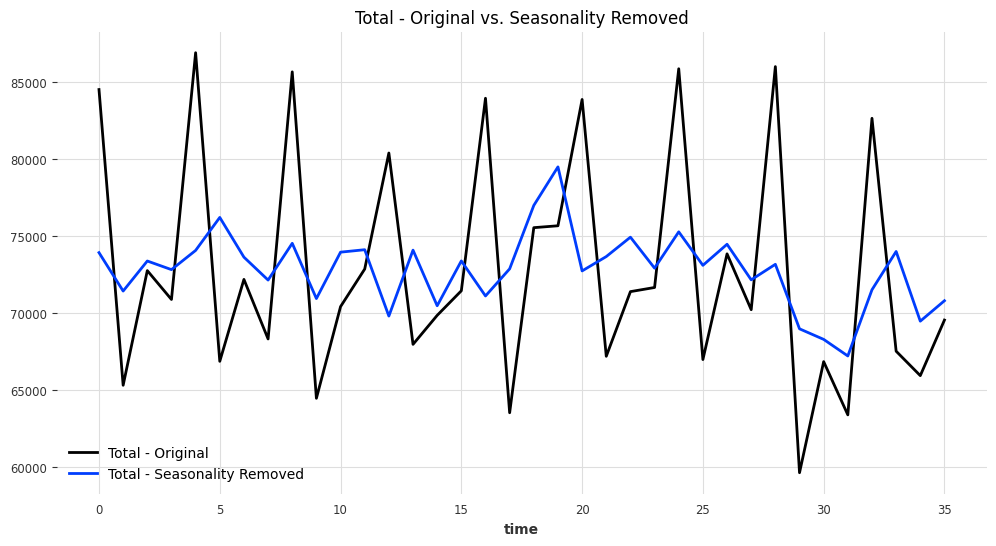


Component: Hol, Seasonality removed.



Component: VFR, Seasonality removed.



Component: Bus, Seasonality removed.


In [ ]:
from darts.utils.statistics import remove_seasonality, SeasonalityMode

# Function to remove seasonality
def remove_seasonality_for_each_component(data, model='mult', method='naive', freq=None, **kwargs):
    """
    Removes the seasonality from each univariate time series (column) in the provided DataFrame and plots the original vs. transformed series.

    Parameters:
    ----------
    data : pd.DataFrame
        A DataFrame containing the time series data. Each column represents a component (time series).

    model : str, optional
        The type of decomposition to use. Can be 'add' for additive or 'mult' for multiplicative. Default is 'mult'.

    method : str, optional
        The method to be used for the decomposition. Options are "naive", "STL". Default is "naive".

    freq : int, optional
        The seasonality period to use. If None, the period will be inferred. Default is None.

    **kwargs : dict
        Additional keyword arguments to pass to the `remove_seasonality()` function.

    Returns:
    -------
    seasonality_removed_results : dict
        A dictionary where keys are the column names (component names) and values are the seasonality-adjusted `TimeSeries`.

    Examples:
    --------
    # Assuming 'data' is a DataFrame containing the time series data
    seasonality_removed_results = remove_seasonality_for_each_component(data, freq=12, model='add')
    """

    # Map the string model to the corresponding SeasonalityMode
    if model == 'add':
        model_mode = SeasonalityMode.ADDITIVE
    elif model == 'mult':
        model_mode = SeasonalityMode.MULTIPLICATIVE
    else:
        raise ValueError("Invalid model type. Use 'add' for additive or 'mult' for multiplicative.")

    seasonality_removed_results = {}

    for column in data.columns:
        # Convert the column into a univariate TimeSeries
        ts = TimeSeries.from_dataframe(data[[column]])

        # Remove seasonality for the current time series
        ts_adjusted = remove_seasonality(ts, freq=freq, model=model_mode, method=method, **kwargs)

        # Store the result
        seasonality_removed_results[column] = ts_adjusted
        print(f"\nComponent: {column}, Seasonality removed.")

        # Plot the original vs. seasonality-removed series
        plt.figure(figsize=(12, 6))
        ts.plot(label=f"{column} - Original")
        ts_adjusted.plot(label=f"{column} - Seasonality Removed")
        plt.legend()
        plt.title(f"{column} - Original vs. Seasonality Removed")
        plt.show()

    return seasonality_removed_results

# Use the function
seasonality_removed_results = remove_seasonality_for_each_component(data, model='add', freq=12)


Component: Total, Trend removed.


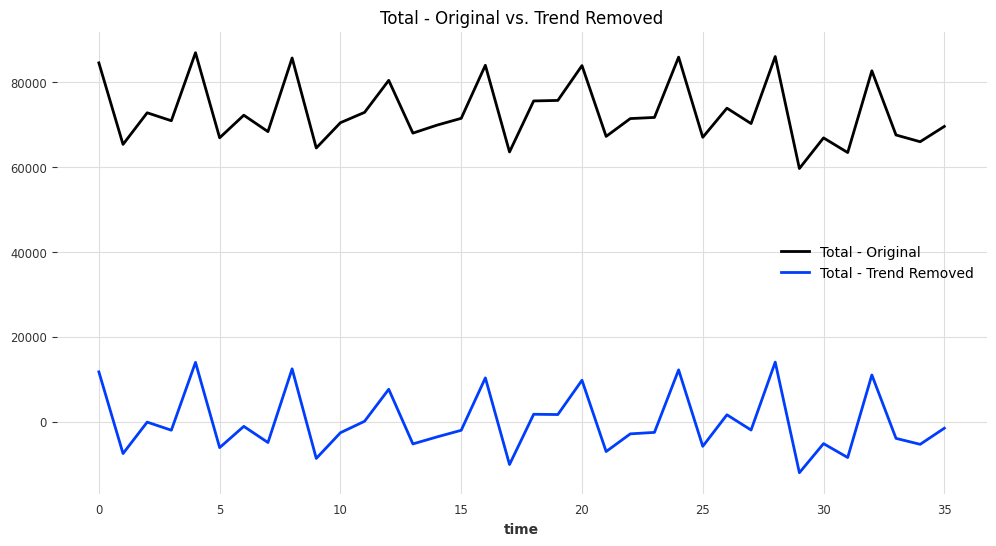


Component: Hol, Trend removed.


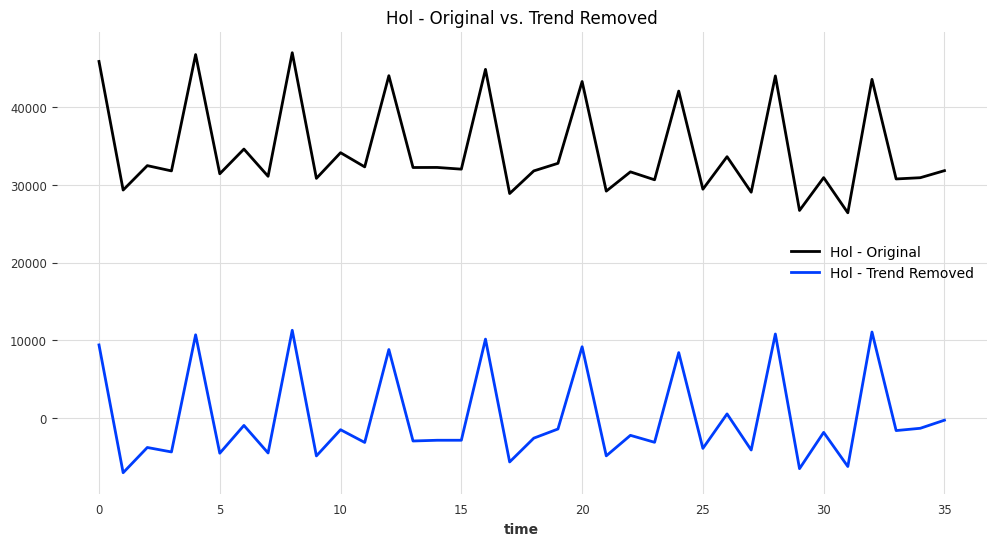


Component: VFR, Trend removed.



Component: Bus, Trend removed.


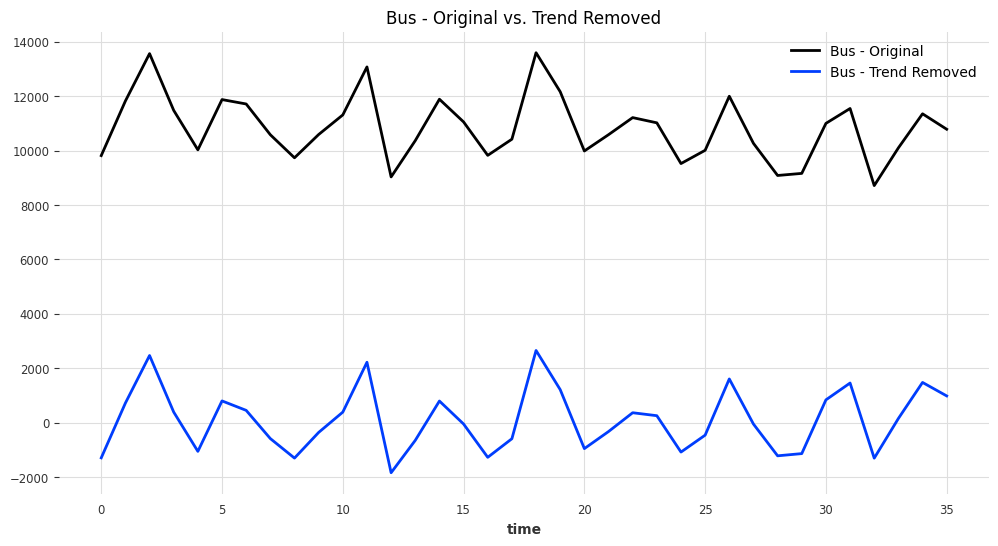

In [ ]:
from darts.utils.statistics import remove_trend, ModelMode

# Function to remove trend
def remove_trend_for_each_component(data, model='mult', method='naive', freq=None, **kwargs):
    """
    Removes the trend from each univariate time series (column) in the provided DataFrame and plots the original vs. transformed series.

    Parameters:
    ----------
    data : pd.DataFrame
        A DataFrame containing the time series data. Each column represents a component (time series).

    model : str, optional
        The type of decomposition to use. Can be 'add' for additive or 'mult' for multiplicative. Default is 'mult'.

    method : str, optional
        The method to be used for the decomposition. Options are "naive", "STL". Default is "naive".

    freq : int, optional
        The seasonality period to use for decomposition. Default is None.

    **kwargs : dict
        Additional keyword arguments to pass to the `remove_trend()` function.

    Returns:
    -------
    trend_removed_results : dict
        A dictionary where keys are the column names (component names) and values are the trend-adjusted `TimeSeries`.

    Examples:
    --------
    # Assuming 'data' is a DataFrame containing the time series data
    trend_removed_results = remove_trend_for_each_component(data, model='add', freq=12)
    """

    # Map the string model to the corresponding ModelMode
    if model == 'add':
        model_mode = ModelMode.ADDITIVE
    elif model == 'mult':
        model_mode = ModelMode.MULTIPLICATIVE
    else:
        raise ValueError("Invalid model type. Use 'add' for additive or 'mult' for multiplicative.")

    trend_removed_results = {}

    for column in data.columns:
        # Convert the column into a univariate TimeSeries
        ts = TimeSeries.from_dataframe(data[[column]])

        # Remove trend for the current time series
        ts_adjusted = remove_trend(ts, model=model_mode, method=method, freq=freq, **kwargs)

        # Store the result
        trend_removed_results[column] = ts_adjusted
        print(f"\nComponent: {column}, Trend removed.")

        # Plot the original vs. trend-removed series
        plt.figure(figsize=(12, 6))
        ts.plot(label=f"{column} - Original")
        ts_adjusted.plot(label=f"{column} - Trend Removed")
        plt.legend()
        plt.title(f"{column} - Original vs. Trend Removed")
        plt.show()

    return trend_removed_results

# Use the function
trend_removed_results = remove_trend_for_each_component(data, model='add', freq=12)

In [ ]:
from darts.utils.statistics import stationarity_test_adf

# Function to perform ADF stationarity test
def adf_test_for_each_component(data, maxlag=None, regression='c', autolag='AIC'):
    """
    Performs the Augmented Dickey-Fuller (ADF) test for stationarity on each univariate time series (column) in the provided DataFrame.

    Parameters:
    ----------
    data : pd.DataFrame
        A DataFrame containing the time series data. Each column represents a component (time series).

    maxlag : int, optional
        Maximum lag which is included in test, default value of 12*(nobs/100)^{1/4} is used when None.

    regression : str, optional
        Constant and trend order to include in regression. Options are “c” (constant only), “ct” (constant and trend),
        “ctt” (constant, and linear and quadratic trend), and “n” (no constant, no trend). Default is “c”.

    autolag : str, optional
        Method to use when automatically determining the lag length among the values 0, 1, …, maxlag. Options are “AIC” (default),
        “BIC”, and “t-stat”. If None, then the number of included lags is set to maxlag.

    Returns:
    -------
    adf_results : dict
        A dictionary where keys are the column names (component names) and values are dictionaries containing the results of the ADF test.

    Examples:
    --------
    # Assuming 'data' is a DataFrame containing the time series data
    adf_results = adf_test_for_each_component(data)
    """

    adf_results = {}

    for column in data.columns:
        # Convert the column into a univariate TimeSeries
        ts = TimeSeries.from_dataframe(data[[column]])

        # Perform the ADF test
        adf_stat, pvalue, usedlag, nobs, critical_values, icbest = stationarity_test_adf(ts, maxlag=maxlag, regression=regression, autolag=autolag)

        # Store the result
        adf_results[column] = {
            'adf_stat': adf_stat,
            'pvalue': pvalue,
            'usedlag': usedlag,
            'nobs': nobs,
            'critical_values': critical_values,
            'icbest': icbest
        }
        print(f"\nComponent: {column}, ADF Test Statistic: {adf_stat}, p-value: {pvalue}, Used Lag: {usedlag}")
        print(f"Critical Values: {critical_values}")

    return adf_results

# Use the function
adf_results = adf_test_for_each_component(data)


Component: Total, ADF Test Statistic: -2.076903354816675, p-value: 0.25390271074373094, Used Lag: 10
Critical Values: {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}

Component: Hol, ADF Test Statistic: -0.584148186856974, p-value: 0.8745238079408595, Used Lag: 10
Critical Values: {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}

Component: VFR, ADF Test Statistic: -2.0439506303053196, p-value: 0.2676407642731954, Used Lag: 5
Critical Values: {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}

Component: Bus, ADF Test Statistic: -0.8455775595867813, p-value: 0.8053661773712363, Used Lag: 10
Critical Values: {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}


In [ ]:
from darts.utils.statistics import stationarity_test_kpss

# Function to perform KPSS stationarity test
def kpss_test_for_each_component(data, regression='c', nlags='auto'):
    """
    Performs the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for stationarity on each univariate time series (column) in the provided DataFrame.

    Parameters:
    ----------
    data : pd.DataFrame
        A DataFrame containing the time series data. Each column represents a component (time series).

    regression : str, optional
        The null hypothesis for the KPSS test. Options are ‘c’ (stationary around a constant) or ‘ct’ (stationary around a trend). Default is ‘c’.

    nlags : Union[str, int], optional
        Indicates the number of lags to be used. If ‘auto’ (default), lags are calculated using the data-dependent method of Hobijn et al. (1998).
        If set to ‘legacy’, uses int(12 * (n / 100)**(1 / 4)) , as outlined in Schwert (1989).

    Returns:
    -------
    kpss_results : dict
        A dictionary where keys are the column names (component names) and values are dictionaries containing the results of the KPSS test.

    Examples:
    --------
    # Assuming 'data' is a DataFrame containing the time series data
    kpss_results = kpss_test_for_each_component(data)
    """

    kpss_results = {}

    for column in data.columns:
        # Convert the column into a univariate TimeSeries
        ts = TimeSeries.from_dataframe(data[[column]])

        # Perform the KPSS test
        kpss_stat, pvalue, lags, crit = stationarity_test_kpss(ts, regression=regression, nlags=nlags)

        # Store the result
        kpss_results[column] = {
            'kpss_stat': kpss_stat,
            'pvalue': pvalue,
            'lags': lags,
            'crit': crit
        }
        print(f"\nComponent: {column}, KPSS Test Statistic: {kpss_stat}, p-value: {pvalue}, Lags: {lags}")
        print(f"Critical Values: {crit}")

    return kpss_results

# Use the function
kpss_results = kpss_test_for_each_component(data)


Component: Total, KPSS Test Statistic: 0.2625932061806782, p-value: 0.1, Lags: 6
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Component: Hol, KPSS Test Statistic: 0.42138852598520726, p-value: 0.06793598017878998, Lags: 9
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Component: VFR, KPSS Test Statistic: 0.25729548874278835, p-value: 0.1, Lags: 1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Component: Bus, KPSS Test Statistic: 0.3457180011843849, p-value: 0.1, Lags: 13
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.10/dist-packages/darts/utils/statistics.py:462: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return kpss(ts.values(copy=False), regression, nlags)
/usr/local/lib/python3.10/dist-packages/darts/utils/statistics.py:462: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return kpss(ts.values(copy=False), regression, nlags)
/usr/local/lib/python3.10/dist-packages/darts/utils/statistics.py:462: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return kpss(ts.values(copy=False), regression, nlags)


In [ ]:
from darts.utils.statistics import stationarity_tests

# Function to perform ADF and KPSS stationarity tests
def combined_stationarity_tests_for_each_component(data, p_value_threshold_adfuller=0.05, p_value_threshold_kpss=0.05):
    """
    Performs both the Augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for stationarity on each univariate time series (column) in the provided DataFrame.

    Parameters:
    ----------
    data : pd.DataFrame
        A DataFrame containing the time series data. Each column represents a component (time series).

    p_value_threshold_adfuller : float, optional
        p_value threshold to reject stationarity for the Augmented Dickey-Fuller test. Default is 0.05.

    p_value_threshold_kpss : float, optional
        p_value threshold to reject non-stationarity for the Kwiatkowski-Phillips-Schmidt-Shin test. Default is 0.05.

    Returns:
    -------
    combined_results : dict
        A dictionary where keys are the column names (component names) and values are booleans indicating whether the time series is stationary or not.

    Examples:
    --------
    # Assuming 'data' is a DataFrame containing the time series data
    combined_results = combined_stationarity_tests_for_each_component(data)
    """

    combined_results = {}

    for column in data.columns:
        # Convert the column into a univariate TimeSeries
        ts = TimeSeries.from_dataframe(data[[column]])

        # Perform the combined stationarity tests
        is_stationary = stationarity_tests(ts, p_value_threshold_adfuller=p_value_threshold_adfuller, p_value_threshold_kpss=p_value_threshold_kpss)

        # Store the result
        combined_results[column] = is_stationary
        print(f"\nComponent: {column}, Is Stationary: {is_stationary}")

    return combined_results

# Use the function
combined_results = combined_stationarity_tests_for_each_component(data)


Component: Total, Is Stationary: False

Component: Hol, Is Stationary: False

Component: VFR, Is Stationary: False

Component: Bus, Is Stationary: False


/usr/local/lib/python3.10/dist-packages/darts/utils/statistics.py:462: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return kpss(ts.values(copy=False), regression, nlags)
/usr/local/lib/python3.10/dist-packages/darts/utils/statistics.py:462: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return kpss(ts.values(copy=False), regression, nlags)
/usr/local/lib/python3.10/dist-packages/darts/utils/statistics.py:462: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return kpss(ts.values(copy=False), regression, nlags)


# Split the Data

In [ ]:
# Load the dataset
dataset = AustralianTourismDataset()
time_series = dataset.load()

# Display the time series
display(time_series)

<TimeSeries (DataArray) (time: 36, component: 96, sample: 1)> Size: 28kB
array([[[84503.],
        [45906.],
        [26042.],
        ...,
        [ 6841.],
        [ 3775.],
        [  483.]],

       [[65312.],
        [29347.],
        [20676.],
        ...,
        [ 6119.],
        [ 2091.],
        [ 1431.]],

       [[72753.],
        [32492.],
        [20582.],
        ...,
...
        ...,
        [ 6987.],
        [ 2788.],
        [ 1356.]],

       [[65938.],
        [30938.],
        [19751.],
        ...,
        [ 7669.],
        [ 1433.],
        [ 2685.]],

       [[69544.],
        [31845.],
        [22758.],
        ...,
        [ 7941.],
        [ 1603.],
        [ 1765.]]])
Coordinates:
  * time       (time) int64 288B 0 1 2 3 4 5 6 7 8 ... 28 29 30 31 32 33 34 35
  * component  (component) object 768B 'Total' 'Hol' 'VFR' ... 'WA' 'TAS' 'NT'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
# Display the data types of the original data and the current data
display(type(time_series))
display(type(data))

darts.timeseries.TimeSeries

pandas.core.frame.DataFrame

In [ ]:
# Convert DataFrame data to TimeSeries DataArray
time_series_multiple = TimeSeries.from_dataframe(data)

# Display the data types
display(type(time_series_multiple))

# Display the converted time series
print("\n")
display(time_series_multiple)

darts.timeseries.TimeSeries

<TimeSeries (DataArray) (time: 36, component: 4, sample: 1)> Size: 1kB
array([[[84503.],
        [45906.],
        [26042.],
        [ 9815.]],

       [[65312.],
        [29347.],
        [20676.],
        [11823.]],

       [[72753.],
        [32492.],
        [20582.],
        [13565.]],

       [[70880.],
        [31813.],
        [21613.],
        [11478.]],

...

       [[82637.],
        [43601.],
        [26245.],
        [ 8712.]],

       [[67523.],
        [30777.],
        [22948.],
        [10099.]],

       [[65938.],
        [30938.],
        [19751.],
        [11352.]],

       [[69544.],
        [31845.],
        [22758.],
        [10784.]]])
Coordinates:
  * time       (time) int64 288B 0 1 2 3 4 5 6 7 8 ... 28 29 30 31 32 33 34 35
  * component  (component) object 32B 'Total' 'Hol' 'VFR' 'Bus'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

Original dataset length: 36
Train set length: 30 (83.33% of original data)
Test set length: 6 (16.67% of original data)

Vertical Split Type: simple

Components available in the TimeSeries:
Index(['Total', 'Hol', 'VFR', 'Bus'], dtype='object', name='component') 



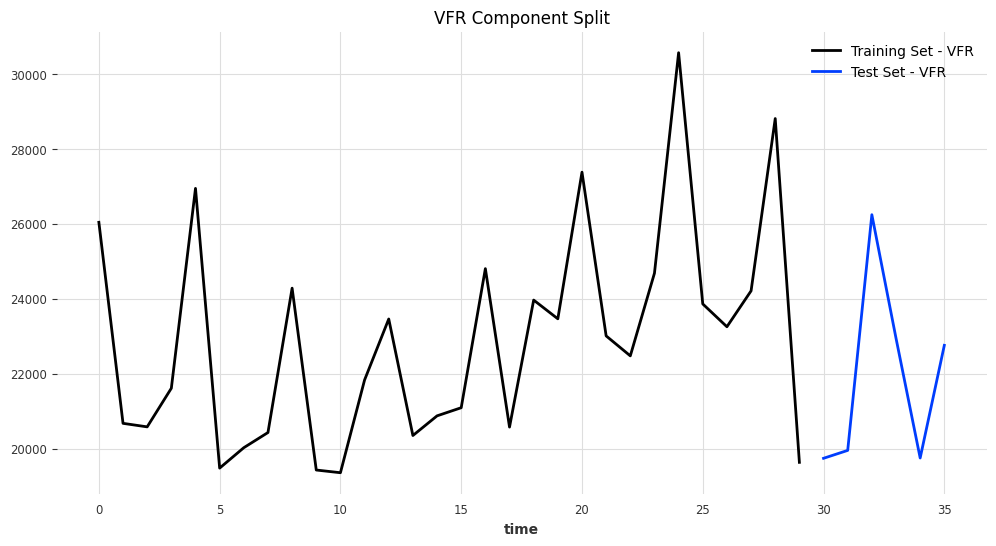

In [ ]:
from darts.utils.model_selection import train_test_split

# Function to split and display the data
def split_and_display_time_series(
    time_series,
    test_size=0.2,
    vertical_split_type='simple',
    components_to_plot=None
):
    """
    Splits a TimeSeries object into training and test sets and displays relevant information.

    Parameters:
    ----------
    time_series : TimeSeries
        The TimeSeries object to be split.

    test_size : Union[float, int], optional
        The proportion or absolute number of time steps in the test set. Default is 0.2 (20%).

    vertical_split_type : str, optional
        The type of vertical split. Can be 'simple' or 'model-aware'. Default is 'simple'.

    components_to_plot : list, optional
        A list of component names to plot. If None, all components will be plotted. Default is None.

    Returns:
    -------
    train_set : TimeSeries
        The resulting training set.

    test_set : TimeSeries
        The resulting test set.
    """

    # Perform the split
    train_set, test_set = train_test_split(
        time_series,
        test_size=test_size,
        axis=1,
        vertical_split_type=vertical_split_type
    )

    # Display the lengths of the resulting splits and their percentages of the original data
    original_length = len(time_series)
    train_length = len(train_set)
    test_length = len(test_set)

    train_percentage = (train_length / original_length) * 100
    test_percentage = (test_length / original_length) * 100

    print(f"Original dataset length: {original_length}")
    print(f"Train set length: {train_length} ({train_percentage:.2f}% of original data)")
    print(f"Test set length: {test_length} ({test_percentage:.2f}% of original data)\n")

    # Display the input parameters used
    print(f"Vertical Split Type: {vertical_split_type}\n")

    # Check available components
    components = train_set.components
    print("Components available in the TimeSeries:")
    print(components, "\n")

    # Determine which components to plot
    if components_to_plot is None:
        components_to_plot = components  # Plot all components if none specified
    else:
        components_to_plot = [comp for comp in components_to_plot if comp in components]  # Ensure valid components

    # Plot the specified components from the training and test sets
    for component in components_to_plot:
        plt.figure(figsize=(12, 6))
        train_set[component].plot(label=f'Training Set - {component}')
        test_set[component].plot(label=f'Test Set - {component}')
        plt.title(f'{component} Component Split')
        plt.legend()
        plt.show()
        print("\n")

    return train_set, test_set

# Use the function
train_set, test_set = split_and_display_time_series(
    time_series_multiple,
    test_size=6,
    vertical_split_type='simple',
    components_to_plot=['Total', 'Hol', 'VFR']
)

In [ ]:
# Display the data types
display(type(train_set))
display(type(test_set))

darts.timeseries.TimeSeries

darts.timeseries.TimeSeries

# Create Pipeline

In [ ]:
from darts.dataprocessing.transformers import MissingValuesFiller, Diff, Scaler
from darts.dataprocessing.pipeline import Pipeline

# Define the transformers
differencer = Diff(lags=1, dropna=False)
filler_after_diff = MissingValuesFiller()
scaler = Scaler()

# Initialize the pipeline
pipeline = Pipeline([differencer, filler_after_diff, scaler])

Pipeline Configuration:

Transformer: Diff
{'_lags': (1,), '_dropna': False, '_fixed_params': {'_lags': (1,), '_dropna': False}, '_parallel_params': (), '_mask_components': False, '_name': 'Diff', '_verbose': False, '_n_jobs': 1, '_fit_called': True, '_fitted_params': [(array([[[66846.],
        [30947.],
        [19743.],
        [11000.]]]), None, 30, 1)], '_global_fit': False}

Transformer: MissingValuesFiller
{'_fill': 'auto', '_fixed_params': {'_fill': 'auto'}, '_parallel_params': (), '_mask_components': True, '_name': 'MissingValuesFiller', '_verbose': False, '_n_jobs': 1}

Transformer: Scaler
{'transformer': MinMaxScaler(), '_fixed_params': {'transformer': MinMaxScaler()}, '_parallel_params': (), '_mask_components': True, '_name': 'Scaler', '_verbose': False, '_n_jobs': 1, '_fit_called': True, '_fitted_params': [MinMaxScaler()], '_global_fit': False}

Transformed training set length: 30
Transformed test set length: 6



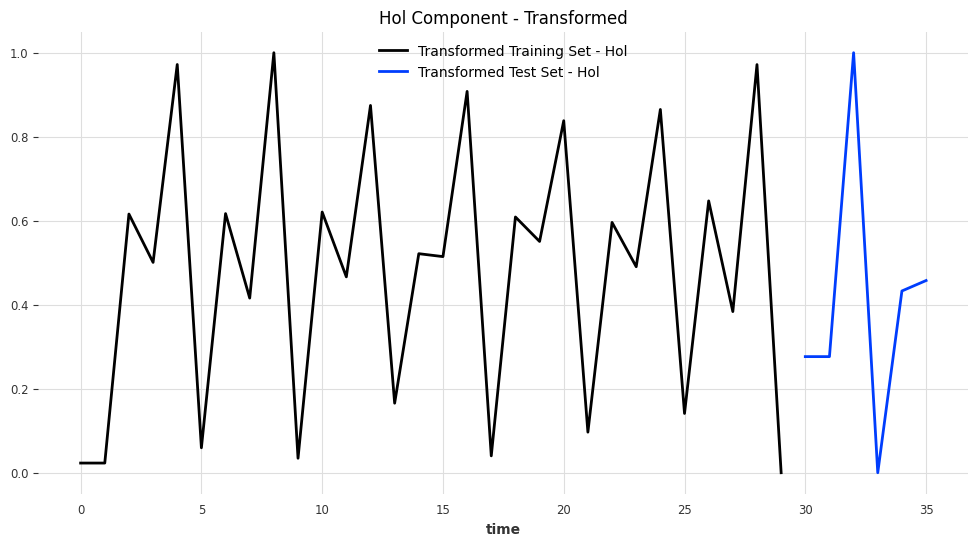

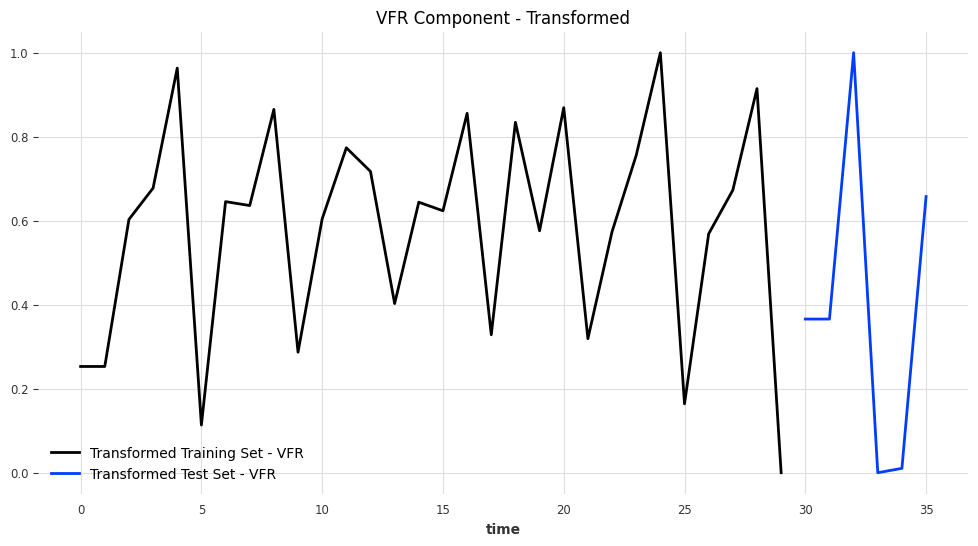

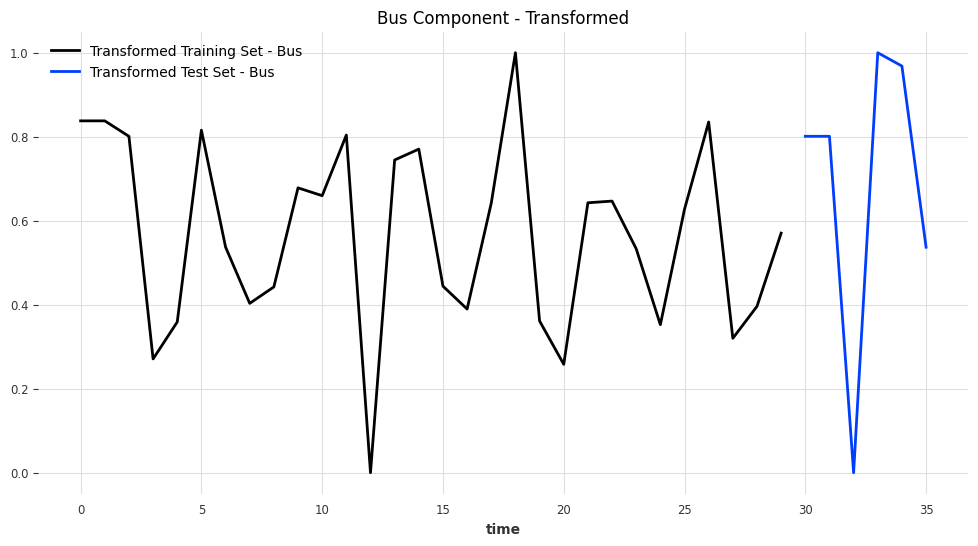

In [ ]:
# Function to create and apply a transformation pipeline
def create_and_apply_pipeline(train_set, test_set, pipeline):
    """
    Applies the provided transformation pipeline to the training and test sets.

    Parameters:
    ----------
    train_set : TimeSeries
        The TimeSeries object for the training set.
    test_set : TimeSeries
        The TimeSeries object for the test set.
    pipeline : Pipeline
        The pipeline containing the transformation steps.

    Returns:
    -------
    transformed_train_set : TimeSeries
        The transformed training set.
    transformed_test_set : TimeSeries
        The transformed test set.
    train_pipeline : Pipeline
        The pipeline used for transforming the training set.
    test_pipeline : Pipeline
        The pipeline used for transforming the test set.
    """
    # Create new instances of the pipeline for the training set and test set
    train_pipeline = Pipeline(pipeline._transformers)
    test_pipeline = Pipeline(pipeline._transformers)

    # Fit and transform the training set
    transformed_train_set = train_pipeline.fit_transform(train_set)

    # Fit and transform the test set
    transformed_test_set = test_pipeline.fit_transform(test_set)

    # Display the pipeline configuration
    print("Pipeline Configuration:")
    for transformer in train_pipeline._transformers:
        print(f"\nTransformer: {transformer.__class__.__name__}")
        print(vars(transformer))  # Print the internal state of the transformer

    # Display the transformed series lengths
    print(f"\nTransformed training set length: {len(transformed_train_set)}")
    print(f"Transformed test set length: {len(transformed_test_set)}\n")

    # Display the transformed components
    for component in transformed_train_set.components:
        plt.figure(figsize=(12, 6))
        transformed_train_set[component].plot(label=f'Transformed Training Set - {component}')
        transformed_test_set[component].plot(label=f'Transformed Test Set - {component}')
        plt.title(f'{component} Component - Transformed')
        plt.legend()
        plt.show()

    print("\n")
    return transformed_train_set, transformed_test_set, train_pipeline, test_pipeline

# Use the function
transformed_train_set, transformed_test_set, train_pipeline, test_pipeline = create_and_apply_pipeline(
    train_set,
    test_set,
    pipeline
)

In [ ]:
from darts.models import RegressionModel
from sklearn.ensemble import HistGradientBoostingRegressor

# Function to create and fit the forecaster
def create_and_fit_regression_model(
    train_set,
    lags,
    output_chunk_length,
    sklearn_regressor=None,
    **kwargs
):
    """
    Creates and fits a Darts RegressionModel from an sklearn regressor.

    Parameters:
    ----------
    train_set : TimeSeries
        The training set to be used for fitting the model.

    lags : int or list of int
        The number of past lags to consider for the model.

    output_chunk_length : int
        The number of time steps to predict in one shot.

    sklearn_regressor : sklearn regressor, optional
        The sklearn regressor to be wrapped. If None, defaults to HistGradientBoostingRegressor.

    **kwargs : additional keyword arguments
        Additional keyword arguments passed to the RegressionModel constructor.

    Returns:
    -------
    model : RegressionModel
        The fitted Darts RegressionModel object.
    """

    # Use the provided sklearn regressor or default to HistGradientBoostingRegressor
    if sklearn_regressor is None:
        sklearn_regressor = HistGradientBoostingRegressor()

    # Create the RegressionModel with additional kwargs
    model = RegressionModel(
        lags=lags,
        model=sklearn_regressor,
        output_chunk_length=output_chunk_length,
        **kwargs
    )

    # Fit the model to the training data
    model.fit(train_set)

    return model

# Use the function
sklearn_regressor = HistGradientBoostingRegressor()
hgb_forecaster = create_and_fit_regression_model(
    train_set=transformed_train_set,  # Transformed training set from the pipeline
    lags=6,
    output_chunk_length=1,
    sklearn_regressor=sklearn_regressor,
    multi_models=True,  # Additional kwarg
    use_static_covariates=True  # Additional kwarg
)

In [ ]:
# Wrapper to make forecaster based on scikit-learn's HistGradientBoostingRegressor() into a probabilistic forecaster
"""
HistGradientBoosting Model
--------------

This is a HistGradientBoosting implementation of Gradient Boosted Trees algorithm.

This implementation comes with the ability to produce probabilistic forecasts.
"""

from typing import List, Optional, Sequence, Tuple, Union

import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor

from darts.logging import get_logger
from darts.models.forecasting.regression_model import (
    FUTURE_LAGS_TYPE,
    LAGS_TYPE,
    RegressionModel,
    _LikelihoodMixin,
)
from darts.timeseries import TimeSeries

logger = get_logger(__name__)


class HistGradientBoostingModel(RegressionModel, _LikelihoodMixin):
    def __init__(
        self,
        lags: Optional[LAGS_TYPE] = None,
        lags_past_covariates: Optional[LAGS_TYPE] = None,
        lags_future_covariates: Optional[FUTURE_LAGS_TYPE] = None,
        output_chunk_length: int = 1,
        output_chunk_shift: int = 0,
        add_encoders: Optional[dict] = None,
        likelihood: Optional[str] = None,
        quantiles: Optional[List[float]] = None,
        random_state: Optional[int] = None,
        multi_models: Optional[bool] = True,
        use_static_covariates: bool = True,
        **kwargs,
    ):
        """HistGradientBoostingModel

        Parameters
        ----------
        lags
            Lagged target `series` values used to predict the next time step/s.
        lags_past_covariates
            Lagged `past_covariates` values used to predict the next time step/s.
        lags_future_covariates
            Lagged `future_covariates` values used to predict the next time step/s.
        output_chunk_length
            Number of time steps predicted at once (per chunk) by the internal model.
        output_chunk_shift
            Optionally, the number of steps to shift the start of the output chunk into the future.
        add_encoders
            A large number of past and future covariates can be automatically generated with `add_encoders`.
        likelihood
            Can be set to `quantile` or `poisson`. If set, the model will be probabilistic, allowing sampling at prediction time.
        quantiles
            Fit the model to these quantiles if the `likelihood` is set to `quantile`.
        random_state
            Control the randomness in the fitting procedure and for sampling.
        multi_models
            If True, a separate model will be trained for each future lag to predict.
        use_static_covariates
            Whether the model should use static covariate information in case the input `series` passed to `fit()`
            contain static covariates.
        **kwargs
            Additional keyword arguments passed to `HistGradientBoostingRegressor`.
        """
        kwargs["random_state"] = random_state
        self.kwargs = kwargs
        self._median_idx = None
        self._model_container = None
        self.quantiles = None
        self.likelihood = likelihood
        self._rng = np.random.default_rng(random_state)

        # parse likelihood
        available_likelihoods = ["quantile", "poisson"]
        if likelihood is not None:
            self._check_likelihood(likelihood, available_likelihoods)
            if likelihood == "quantile":
                self.quantiles, self._median_idx = self._prepare_quantiles(quantiles)
                self._model_container = self._get_model_container()

        super().__init__(
            lags=lags,
            lags_past_covariates=lags_past_covariates,
            lags_future_covariates=lags_future_covariates,
            output_chunk_length=output_chunk_length,
            output_chunk_shift=output_chunk_shift,
            add_encoders=add_encoders,
            multi_models=multi_models,
            model=HistGradientBoostingRegressor(**self.kwargs),
            use_static_covariates=use_static_covariates,
        )

    def fit(
        self,
        series: Union[TimeSeries, Sequence[TimeSeries]],
        past_covariates: Optional[Union[TimeSeries, Sequence[TimeSeries]]] = None,
        future_covariates: Optional[Union[TimeSeries, Sequence[TimeSeries]]] = None,
        max_samples_per_ts: Optional[int] = None,
        n_jobs_multioutput_wrapper: Optional[int] = None,
        sample_weight: Optional[Union[TimeSeries, Sequence[TimeSeries], str]] = None,
        **kwargs,
    ):
        """
        Fits/trains the model using the provided list of features time series and the target time series.

        Parameters
        ----------
        series
            TimeSeries or Sequence[TimeSeries] object containing the target values.
        past_covariates
            Optionally, a series or sequence of series specifying past-observed covariates.
        future_covariates
            Optionally, a series or sequence of series specifying future-known covariates.
        max_samples_per_ts
            Integer upper bound on the number of tuples that can be produced per time series.
        n_jobs_multioutput_wrapper
            Number of jobs of the MultiOutputRegressor wrapper to run in parallel. Only used if the model doesn't
            support multi-output regression natively.
        sample_weight
            Optionally, sample weights to apply to the target `series` labels.
        **kwargs
            Additional kwargs passed to `HistGradientBoostingRegressor.fit()`.
        """
        if self.likelihood == "quantile":
            # empty model container in case of multiple calls to fit, e.g. when backtesting
            self._model_container.clear()
            for quantile in self.quantiles:
                self.kwargs["quantile"] = quantile
                self.model = HistGradientBoostingRegressor(loss="quantile", **self.kwargs)
                super().fit(
                    series=series,
                    past_covariates=past_covariates,
                    future_covariates=future_covariates,
                    max_samples_per_ts=max_samples_per_ts,
                    n_jobs_multioutput_wrapper=n_jobs_multioutput_wrapper,
                    sample_weight=sample_weight,
                    **kwargs,
                )

                self._model_container[quantile] = self.model
            return self

        super().fit(
            series=series,
            past_covariates=past_covariates,
            future_covariates=future_covariates,
            max_samples_per_ts=max_samples_per_ts,
            n_jobs_multioutput_wrapper=n_jobs_multioutput_wrapper,
            sample_weight=sample_weight,
            **kwargs,
        )
        return self

    def _predict_and_sample(
        self,
        x: np.ndarray,
        num_samples: int,
        predict_likelihood_parameters: bool,
        **kwargs,
    ) -> np.ndarray:
        """Override of RegressionModel's predict method to allow for the probabilistic case"""
        if self.likelihood is not None:
            return self._predict_and_sample_likelihood(
                x, num_samples, self.likelihood, predict_likelihood_parameters, **kwargs
            )
        else:
            return super()._predict_and_sample(
                x, num_samples, predict_likelihood_parameters, **kwargs
            )

    @property
    def supports_probabilistic_prediction(self) -> bool:
        return self.likelihood is not None

    @property
    def min_train_series_length(self) -> int:
        # requires a minimum of 2 train samples
        return max(
            3,
            (
                -self.lags["target"][0] + self.output_chunk_length + 1
                if "target" in self.lags
                else self.output_chunk_length
            ),
        )

In [ ]:
# Initialize the HistGradientBoostingModel
hgb_proba_forecaster = HistGradientBoostingModel(
    lags=6,
    output_chunk_length=1,
    likelihood="quantile",
    quantiles=[0.1, 0.25, 0.5, 0.75, 0.9],
)

# Fit the model
hgb_proba_forecaster.fit(transformed_train_set)

HistGradientBoostingModel(lags=6, lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=1, output_chunk_shift=0, add_encoders=None, likelihood=quantile, quantiles=[0.1, 0.25, 0.5, 0.75, 0.9], random_state=None, multi_models=True, use_static_covariates=True)

# Forecasting

In [ ]:
# Function to get the predictions
def get_predictions(model, test_set, num_samples=200):
    """
    Get predictions and prediction samples from the model.

    Parameters:
    ----------
    model : RegressionModel
        The trained model to use for predictions.
    test_set : TimeSeries
        The test data.
    num_samples : int
        The number of prediction samples to generate.

    Returns:
    ----------
    pred : TimeSeries
        The point predictions.
    pred_samples : List[TimeSeries]
        The prediction samples.
    pred_params : TimeSeries
        The prediction parameters.
    """
    pred = model.predict(len(test_set))
    pred_samples = model.predict(len(test_set), num_samples=num_samples)
    pred_params = model.predict(n=1, num_samples=1, predict_likelihood_parameters=True)
    return pred, pred_samples, pred_params

# Use the function
pred, pred_samples, pred_params = get_predictions(
    model=hgb_proba_forecaster,
    test_set=transformed_test_set
)

In [ ]:
# Print dimensions
print("Time steps:", pred_samples.n_timesteps)
print("Components:", pred_samples.n_components)
print("Samples:", pred_samples.n_samples)

Time steps: 6
Components: 4
Samples: 200


In [ ]:
# Print TimeSeries information
print(f"Time index for point predictions: {pred.time_index}")
print(f"Components for point predictions: {pred.components}\n")
display(pred)

Time index for point predictions: RangeIndex(start=30, stop=36, step=1, name='time')
Components for point predictions: Index(['Total', 'Hol', 'VFR', 'Bus'], dtype='object', name='component')



<TimeSeries (DataArray) (time: 6, component: 4, sample: 1)> Size: 192B
array([[[0.65270784],
        [0.53607534],
        [0.64013014],
        [0.5539175 ]],

       [[0.65270784],
        [0.53607534],
        [0.64013014],
        [0.5539175 ]],

       [[0.65270784],
        [0.53607534],
        [0.64013014],
        [0.5539175 ]],

       [[0.65270784],
        [0.53607534],
        [0.64013014],
        [0.5539175 ]],

       [[0.65270784],
        [0.53607534],
        [0.64013014],
        [0.5539175 ]],

       [[0.65270784],
        [0.53607534],
        [0.64013014],
        [0.5539175 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 32B 'Total' 'Hol' 'VFR' 'Bus'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
# Get predictions for time series of interest
target_pred = pred.univariate_component(0)

# Print univariate information
print(f"Timesteps: {target_pred.n_timesteps}, Components: {target_pred.n_components}, Samples: {target_pred.n_samples}")
print(f"Time index for univariate predictions: {target_pred.time_index}")
print(f"Components for univariate predictions: {target_pred.components}\n")
display(target_pred)

Timesteps: 6, Components: 1, Samples: 1
Time index for univariate predictions: RangeIndex(start=30, stop=36, step=1, name='time')
Components for univariate predictions: Index(['Total'], dtype='object', name='component')



<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.65270784]],

       [[0.65270784]],

       [[0.65270784]],

       [[0.65270784]],

       [[0.65270784]],

       [[0.65270784]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
# Function to print likelihood parameter predictions
def print_likelihood_params(pred_params):
    """
    Print the likelihood parameters from the prediction.

    Parameters:
    ----------
    pred_params : TimeSeries
        The prediction parameters to print.
    """
    for val, comp in zip(pred_params.values()[0], pred_params.components):
        print(f"{comp} : {round(val, 3)}")

# Use the function
print_likelihood_params(pred_params)

Total_q0.10 : 0.147
Total_q0.25 : 0.466
Total_q0.50 : 0.653
Total_q0.75 : 0.779
Total_q0.90 : 0.916
Hol_q0.10 : 0.057
Hol_q0.25 : 0.329
Hol_q0.50 : 0.536
Hol_q0.75 : 0.695
Hol_q0.90 : 0.898
VFR_q0.10 : 0.297
VFR_q0.25 : 0.527
VFR_q0.50 : 0.64
VFR_q0.75 : 0.789
VFR_q0.90 : 0.868
Bus_q0.10 : 0.33
Bus_q0.25 : 0.395
Bus_q0.50 : 0.554
Bus_q0.75 : 0.664
Bus_q0.90 : 0.794


In [ ]:
# Create prediction samples DataFrame
pred_samples_df = pred_samples.pd_dataframe()
display(pred_samples_df)

Total_s0  Total_s1  Total_s2  Total_s3  Total_s4  Total_s5  Total_s6  \
time                                                                         
30    0.333738  0.146663  0.884900  0.708737  0.602498  0.671342  0.340113   
31    0.632155  0.146663  0.477441  0.705555  0.500342  0.765853  0.668166   
32    0.713227  0.661219  0.813410  0.805386  0.744688  0.773911  0.423758   
33    0.710744  0.888014  0.900480  0.916469  0.783625  0.916469  0.916469   
34    0.146663  0.774854  0.748314  0.229971  0.146663  0.623962  0.731921   
35    0.916469  0.375982  0.859856  0.651654  0.770576  0.503106  0.619979   

      Total_s7  Total_s8  Total_s9  ...  Bus_s190  Bus_s191  Bus_s192  \
time                                ...                                 
30    0.483704  0.581123  0.836675  ...  0.329762  0.359123  0.606800   
31    0.601387  0.860870  0.812136  ...  0.348943  0.487237  0.781947   
32    0.473234  0.164531  0.769916  ...  0.781164  0.418500  0.664217   
33    0.718289  0.916469  0.916469  ...  0.793937  0.607409  0.450957   
34    0.654196  0.916469  0.661732  ...  0.413024  0.687481  0.603183   
35    0.324282  0.779743  0.820851  ...  0.470335  0.669650  0.711899   

      Bus_s193  Bus_s194  Bus_s195  Bus_s196  Bus_s197  Bus_s198  Bus_s199  
time                                                                        
30    0.329762  0.369605  0.329762  0.749264  0.384392  0.341158  0.572599  
31    0.329762  0.352214  0.624624  0.716013  0.478173  0.793937  0.575320  
32    0.720245  0.353703  0.338030  0.536543  0.361211  0.382975  0.793937  
33    0.640426  0.692917  0.329762  0.563560  0.330805  0.773776  0.504111  
34    0.372977  0.667174  0.341993  0.350512  0.572962  0.418598  0.462164  
35    0.455100  0.791457  0.454027  0.440444  0.793937  0.725065  0.594634  

[6 rows x 800 columns]

In [ ]:
# 3D NumPy array
pred_samples_np = pred_samples.all_values()
print(f"Data type: {type(pred_samples_np)}")
print(f"Timesteps: {pred_samples_np.shape[0]}, Components: {pred_samples_np.shape[1]}, Samples: {pred_samples_np.shape[2]}")

Data type: <class 'numpy.ndarray'>
Timesteps: 6, Components: 4, Samples: 200


In [ ]:
# Iterate over samples to extract all sample-specific data
component_idx = 0
all_samples = []
for sample_idx in range(pred_samples.n_samples):
    sample_ts = pred_samples.univariate_component(component_idx)
    sample_ts = sample_ts.with_values(pred_samples.all_values()[:, component_idx, sample_idx])
    print(f"Sample {sample_idx+1} - n_timesteps: {sample_ts.n_timesteps}, n_components: {sample_ts.n_components}, n_samples: {sample_ts.n_samples}")
    print(f"Time index for sample {sample_idx+1}: {sample_ts.time_index}")
    print(f"Column name for sample {sample_idx+1}: {sample_ts.columns}")
    all_samples.append(sample_ts)
    display(sample_ts)
    print("\n")

Sample 1 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 1: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 1: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.3337379 ]],

       [[0.63215492]],

       [[0.71322712]],

       [[0.71074439]],

       [[0.1466627 ]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 2 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 2: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 2: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.1466627 ]],

       [[0.66121908]],

       [[0.8880138 ]],

       [[0.77485384]],

       [[0.37598221]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 3 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 3: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 3: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.88490047]],

       [[0.47744063]],

       [[0.81340956]],

       [[0.90047959]],

       [[0.74831412]],

       [[0.85985601]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 4 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 4: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 4: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.70873671]],

       [[0.70555541]],

       [[0.80538577]],

       [[0.91646905]],

       [[0.22997149]],

       [[0.65165402]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 5 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 5: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 5: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.60249799]],

       [[0.50034221]],

       [[0.74468847]],

       [[0.78362495]],

       [[0.1466627 ]],

       [[0.77057562]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 6 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 6: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 6: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.67134231]],

       [[0.76585269]],

       [[0.77391135]],

       [[0.91646905]],

       [[0.62396225]],

       [[0.50310594]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 7 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 7: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 7: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.34011319]],

       [[0.66816562]],

       [[0.42375806]],

       [[0.91646905]],

       [[0.73192061]],

       [[0.61997943]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 8 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 8: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 8: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.48370376]],

       [[0.60138659]],

       [[0.47323377]],

       [[0.71828917]],

       [[0.65419557]],

       [[0.32428188]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 9 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 9: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 9: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.5811228 ]],

       [[0.86086983]],

       [[0.16453061]],

       [[0.91646905]],

       [[0.91646905]],

       [[0.77974292]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 10 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 10: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 10: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.83667466]],

       [[0.81213585]],

       [[0.76991554]],

       [[0.91646905]],

       [[0.66173172]],

       [[0.82085052]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 11 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 11: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 11: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.86140263]],

       [[0.6596907 ]],

       [[0.36775594]],

       [[0.56583814]],

       [[0.91646905]],

       [[0.28842621]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 12 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 12: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 12: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.50056939]],

       [[0.76597521]],

       [[0.48456868]],

       [[0.72484487]],

       [[0.43454831]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 13 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 13: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 13: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.7547339 ]],

       [[0.66114956]],

       [[0.74188769]],

       [[0.30913858]],

       [[0.66695394]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 14 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 14: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 14: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.48725732]],

       [[0.82704458]],

       [[0.61168736]],

       [[0.17562378]],

       [[0.59443386]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 15 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 15: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 15: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.78649722]],

       [[0.91646905]],

       [[0.52252223]],

       [[0.64352347]],

       [[0.9096024 ]],

       [[0.85763939]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 16 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 16: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 16: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.70661997]],

       [[0.26912272]],

       [[0.38631525]],

       [[0.52867041]],

       [[0.2309855 ]],

       [[0.59432268]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 17 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 17: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 17: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.70940476]],

       [[0.7411875 ]],

       [[0.49949494]],

       [[0.91646905]],

       [[0.30873093]],

       [[0.57120788]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 18 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 18: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 18: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.16726964]],

       [[0.91646905]],

       [[0.63008435]],

       [[0.78165377]],

       [[0.89075678]],

       [[0.59653582]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 19 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 19: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 19: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.67571934]],

       [[0.63634496]],

       [[0.74411497]],

       [[0.68166334]],

       [[0.84118767]],

       [[0.81800041]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 20 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 20: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 20: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.7357051 ]],

       [[0.91646905]],

       [[0.76568969]],

       [[0.60995689]],

       [[0.54855332]],

       [[0.62266115]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 21 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 21: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 21: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.57078579]],

       [[0.1466627 ]],

       [[0.40637155]],

       [[0.72467323]],

       [[0.52495648]],

       [[0.87081906]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 22 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 22: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 22: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.91646905]],

       [[0.91646905]],

       [[0.73839515]],

       [[0.88041854]],

       [[0.49520437]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 23 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 23: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 23: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.51288861]],

       [[0.85307331]],

       [[0.63978016]],

       [[0.91646905]],

       [[0.53588054]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 24 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 24: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 24: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.52212817]],

       [[0.1466627 ]],

       [[0.77597349]],

       [[0.91646905]],

       [[0.71982141]],

       [[0.65412058]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 25 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 25: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 25: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.82465863]],

       [[0.7713615 ]],

       [[0.62110721]],

       [[0.1466627 ]],

       [[0.52779027]],

       [[0.81133158]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 26 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 26: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 26: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.75534341]],

       [[0.91646905]],

       [[0.70322067]],

       [[0.1466627 ]],

       [[0.65909377]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 27 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 27: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 27: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.73109992]],

       [[0.84634632]],

       [[0.74982984]],

       [[0.8314893 ]],

       [[0.5229936 ]],

       [[0.68589468]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 28 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 28: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 28: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.77700148]],

       [[0.71014888]],

       [[0.33853321]],

       [[0.72490904]],

       [[0.62005822]],

       [[0.1860214 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 29 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 29: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 29: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.64258228]],

       [[0.81823809]],

       [[0.91646905]],

       [[0.744184  ]],

       [[0.87888449]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 30 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 30: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 30: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.30564189]],

       [[0.1466627 ]],

       [[0.87485295]],

       [[0.1466627 ]],

       [[0.80830694]],

       [[0.70989299]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 31 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 31: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 31: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.87982689]],

       [[0.76437076]],

       [[0.49365945]],

       [[0.91646905]],

       [[0.65651819]],

       [[0.83781074]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 32 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 32: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 32: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.66197048]],

       [[0.67210392]],

       [[0.1466627 ]],

       [[0.47074913]],

       [[0.85755287]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 33 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 33: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 33: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.82412214]],

       [[0.70476598]],

       [[0.1466627 ]],

       [[0.71429717]],

       [[0.91646905]],

       [[0.73955408]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 34 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 34: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 34: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.6331714 ]],

       [[0.1466627 ]],

       [[0.1466627 ]],

       [[0.52061357]],

       [[0.8787984 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 35 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 35: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 35: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.6013909 ]],

       [[0.40294511]],

       [[0.62225485]],

       [[0.1466627 ]],

       [[0.1466627 ]],

       [[0.76179501]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 36 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 36: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 36: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.75796595]],

       [[0.88387759]],

       [[0.7965044 ]],

       [[0.56667538]],

       [[0.67202012]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 37 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 37: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 37: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.82631156]],

       [[0.68395534]],

       [[0.53118653]],

       [[0.49127888]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 38 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 38: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 38: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.38596126]],

       [[0.69873983]],

       [[0.28251339]],

       [[0.77836601]],

       [[0.57420097]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 39 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 39: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 39: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.6366371 ]],

       [[0.71677267]],

       [[0.27587262]],

       [[0.30058549]],

       [[0.7316757 ]],

       [[0.78447536]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 40 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 40: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 40: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.66504165]],

       [[0.44628755]],

       [[0.91646905]],

       [[0.73551579]],

       [[0.63845505]],

       [[0.32302739]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 41 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 41: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 41: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.53727179]],

       [[0.64907655]],

       [[0.56681105]],

       [[0.20256207]],

       [[0.79280189]],

       [[0.74810069]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 42 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 42: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 42: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.58450951]],

       [[0.79914914]],

       [[0.87050314]],

       [[0.69831542]],

       [[0.72614235]],

       [[0.19011888]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 43 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 43: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 43: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.75851051]],

       [[0.31794262]],

       [[0.91646905]],

       [[0.677194  ]],

       [[0.34216056]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 44 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 44: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 44: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.69763504]],

       [[0.6722389 ]],

       [[0.1466627 ]],

       [[0.54480208]],

       [[0.91646905]],

       [[0.63368924]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 45 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 45: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 45: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.60020893]],

       [[0.54416236]],

       [[0.71429147]],

       [[0.6813672 ]],

       [[0.7355461 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 46 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 46: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 46: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.65309141]],

       [[0.50689466]],

       [[0.81696043]],

       [[0.39976064]],

       [[0.54818264]],

       [[0.69297275]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 47 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 47: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 47: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.36622066]],

       [[0.1466627 ]],

       [[0.1466627 ]],

       [[0.47336357]],

       [[0.57123962]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 48 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 48: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 48: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.48725857]],

       [[0.21066823]],

       [[0.65748332]],

       [[0.3813244 ]],

       [[0.83550872]],

       [[0.57003882]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 49 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 49: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 49: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.77028304]],

       [[0.68179448]],

       [[0.91646905]],

       [[0.7215827 ]],

       [[0.68016306]],

       [[0.65745743]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 50 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 50: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 50: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.73873061]],

       [[0.71448667]],

       [[0.59958441]],

       [[0.80672387]],

       [[0.50460337]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 51 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 51: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 51: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.69054731]],

       [[0.66353011]],

       [[0.1466627 ]],

       [[0.4144998 ]],

       [[0.74038026]],

       [[0.69743509]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 52 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 52: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 52: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.63200924]],

       [[0.63028457]],

       [[0.73882126]],

       [[0.54601054]],

       [[0.8776061 ]],

       [[0.71465756]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 53 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 53: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 53: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.87859022]],

       [[0.55563755]],

       [[0.8500551 ]],

       [[0.86776977]],

       [[0.6055236 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 54 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 54: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 54: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.18932273]],

       [[0.91646905]],

       [[0.90333272]],

       [[0.1466627 ]],

       [[0.573564  ]],

       [[0.21450783]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 55 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 55: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 55: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.6649107 ]],

       [[0.24221114]],

       [[0.86486258]],

       [[0.79496707]],

       [[0.73202707]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 56 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 56: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 56: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.8495941 ]],

       [[0.1466627 ]],

       [[0.58048462]],

       [[0.80450233]],

       [[0.37615625]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 57 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 57: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 57: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.28395541]],

       [[0.1466627 ]],

       [[0.88059317]],

       [[0.73210716]],

       [[0.1534884 ]],

       [[0.86204304]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 58 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 58: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 58: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.51446745]],

       [[0.41140411]],

       [[0.52477518]],

       [[0.17829942]],

       [[0.48458161]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 59 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 59: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 59: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.83298861]],

       [[0.55104481]],

       [[0.1466627 ]],

       [[0.48507233]],

       [[0.87568811]],

       [[0.49780732]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 60 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 60: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 60: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.68883753]],

       [[0.7755336 ]],

       [[0.18851449]],

       [[0.68844214]],

       [[0.5816283 ]],

       [[0.20509403]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 61 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 61: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 61: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.54679962]],

       [[0.67212521]],

       [[0.7637826 ]],

       [[0.91646905]],

       [[0.66216515]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 62 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 62: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 62: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.73385838]],

       [[0.46682174]],

       [[0.67394223]],

       [[0.76824043]],

       [[0.7022334 ]],

       [[0.65533441]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 63 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 63: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 63: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.43095306]],

       [[0.69734553]],

       [[0.54652874]],

       [[0.91646905]],

       [[0.26902783]],

       [[0.68606727]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 64 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 64: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 64: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.67026794]],

       [[0.91646905]],

       [[0.80012597]],

       [[0.1466627 ]],

       [[0.54072471]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 65 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 65: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 65: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.61024824]],

       [[0.41076212]],

       [[0.75243338]],

       [[0.296521  ]],

       [[0.679121  ]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 66 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 66: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 66: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.64812299]],

       [[0.66836774]],

       [[0.65378252]],

       [[0.24455865]],

       [[0.30432135]],

       [[0.3644656 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 67 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 67: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 67: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.39976365]],

       [[0.69147236]],

       [[0.8723705 ]],

       [[0.73810599]],

       [[0.61062199]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 68 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 68: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 68: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.34078239]],

       [[0.62282193]],

       [[0.58767732]],

       [[0.21679763]],

       [[0.84861938]],

       [[0.56634839]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 69 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 69: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 69: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.63507211]],

       [[0.48347547]],

       [[0.88253401]],

       [[0.21860788]],

       [[0.5706783 ]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 70 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 70: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 70: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.47003383]],

       [[0.75224081]],

       [[0.6631537 ]],

       [[0.19243197]],

       [[0.66832049]],

       [[0.81569694]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 71 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 71: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 71: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.55357448]],

       [[0.65714277]],

       [[0.1466627 ]],

       [[0.67203261]],

       [[0.74817707]],

       [[0.73767184]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 72 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 72: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 72: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.83854061]],

       [[0.66348229]],

       [[0.74712779]],

       [[0.20795727]],

       [[0.67772173]],

       [[0.61946129]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 73 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 73: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 73: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.62844897]],

       [[0.67121517]],

       [[0.86314601]],

       [[0.78888743]],

       [[0.61343148]],

       [[0.23374347]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 74 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 74: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 74: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.68801822]],

       [[0.54627303]],

       [[0.67424486]],

       [[0.1466627 ]],

       [[0.70650073]],

       [[0.48711031]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 75 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 75: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 75: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.59103589]],

       [[0.76796743]],

       [[0.56680717]],

       [[0.49564965]],

       [[0.86941494]],

       [[0.74782859]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 76 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 76: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 76: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.81708739]],

       [[0.49819377]],

       [[0.60957606]],

       [[0.53667433]],

       [[0.29721752]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 77 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 77: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 77: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.86893993]],

       [[0.75659026]],

       [[0.50101332]],

       [[0.54001115]],

       [[0.77709504]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 78 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 78: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 78: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.57300896]],

       [[0.78943153]],

       [[0.40817076]],

       [[0.41876488]],

       [[0.76062678]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 79 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 79: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 79: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.58074798]],

       [[0.1466627 ]],

       [[0.91646905]],

       [[0.91646905]],

       [[0.48011337]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 80 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 80: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 80: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.71421648]],

       [[0.69768998]],

       [[0.34798508]],

       [[0.46216508]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 81 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 81: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 81: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.63994094]],

       [[0.91646905]],

       [[0.75611151]],

       [[0.36125062]],

       [[0.70769611]],

       [[0.7703711 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 82 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 82: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 82: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.38266985]],

       [[0.85378831]],

       [[0.41485045]],

       [[0.2934626 ]],

       [[0.74017842]],

       [[0.88521405]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 83 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 83: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 83: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.65996453]],

       [[0.71025471]],

       [[0.9069127 ]],

       [[0.88174186]],

       [[0.1583514 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 84 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 84: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 84: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91177009]],

       [[0.83634799]],

       [[0.52853134]],

       [[0.47511649]],

       [[0.91646905]],

       [[0.48434583]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 85 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 85: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 85: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.84192174]],

       [[0.68110675]],

       [[0.57075252]],

       [[0.31930544]],

       [[0.59451984]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 86 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 86: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 86: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.49010388]],

       [[0.47839702]],

       [[0.84929301]],

       [[0.38980794]],

       [[0.74814578]],

       [[0.15588228]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 87 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 87: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 87: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.56719026]],

       [[0.70800206]],

       [[0.57805503]],

       [[0.55657511]],

       [[0.71632594]],

       [[0.71522417]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 88 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 88: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 88: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.86980149]],

       [[0.75181169]],

       [[0.6439934 ]],

       [[0.1466627 ]],

       [[0.56534802]],

       [[0.57371828]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 89 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 89: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 89: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.51259679]],

       [[0.21681904]],

       [[0.52891775]],

       [[0.91646905]],

       [[0.58766228]],

       [[0.20133619]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 90 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 90: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 90: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.50768799]],

       [[0.6513031 ]],

       [[0.68506491]],

       [[0.91646905]],

       [[0.81703565]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 91 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 91: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 91: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.27351739]],

       [[0.49183184]],

       [[0.41170622]],

       [[0.1466627 ]],

       [[0.77592183]],

       [[0.69177158]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 92 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 92: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 92: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.89972537]],

       [[0.51870686]],

       [[0.75935832]],

       [[0.91646905]],

       [[0.67177312]],

       [[0.75434054]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 93 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 93: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 93: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.56788877]],

       [[0.82285421]],

       [[0.1466627 ]],

       [[0.1466627 ]],

       [[0.51511278]],

       [[0.89811618]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 94 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 94: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 94: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.53721726]],

       [[0.67971979]],

       [[0.45986656]],

       [[0.74156164]],

       [[0.91646905]],

       [[0.47799132]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 95 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 95: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 95: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.72531156]],

       [[0.58424912]],

       [[0.45688935]],

       [[0.6862645 ]],

       [[0.58296851]],

       [[0.90585057]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 96 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 96: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 96: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.66798156]],

       [[0.54777567]],

       [[0.62090334]],

       [[0.62176076]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 97 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 97: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 97: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.38084712]],

       [[0.91646905]],

       [[0.89621683]],

       [[0.241851  ]],

       [[0.7657141 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 98 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 98: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 98: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.50710557]],

       [[0.55151473]],

       [[0.1466627 ]],

       [[0.80222189]],

       [[0.91646905]],

       [[0.68609942]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 99 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 99: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 99: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.60824419]],

       [[0.70910423]],

       [[0.67898464]],

       [[0.73302566]],

       [[0.73965189]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 100 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 100: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 100: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.91646905]],

       [[0.50874363]],

       [[0.60227662]],

       [[0.49016977]],

       [[0.39807242]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 101 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 101: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 101: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.44582537]],

       [[0.91646905]],

       [[0.86240884]],

       [[0.35351816]],

       [[0.91646905]],

       [[0.72455041]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 102 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 102: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 102: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.52002336]],

       [[0.58307182]],

       [[0.55442546]],

       [[0.5409626 ]],

       [[0.73187999]],

       [[0.83308488]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 103 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 103: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 103: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.69670165]],

       [[0.74791955]],

       [[0.1466627 ]],

       [[0.65846338]],

       [[0.50533019]],

       [[0.4205544 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 104 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 104: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 104: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.60107219]],

       [[0.64418996]],

       [[0.66252917]],

       [[0.59190849]],

       [[0.91646905]],

       [[0.89672358]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 105 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 105: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 105: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.5036992 ]],

       [[0.84748876]],

       [[0.31278159]],

       [[0.62878422]],

       [[0.91249085]],

       [[0.65074084]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 106 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 106: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 106: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.68396535]],

       [[0.91646905]],

       [[0.81847951]],

       [[0.57992299]],

       [[0.58991071]],

       [[0.20231283]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 107 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 107: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 107: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.15909645]],

       [[0.48367745]],

       [[0.54349936]],

       [[0.41479463]],

       [[0.91646905]],

       [[0.5641163 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 108 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 108: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 108: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.45909126]],

       [[0.5406956 ]],

       [[0.90234625]],

       [[0.66626328]],

       [[0.63412719]],

       [[0.74612777]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 109 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 109: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 109: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.34918958]],

       [[0.68407928]],

       [[0.70654101]],

       [[0.62239623]],

       [[0.86212659]],

       [[0.54217645]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 110 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 110: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 110: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91093816]],

       [[0.89998442]],

       [[0.1466627 ]],

       [[0.16563581]],

       [[0.18365699]],

       [[0.65129475]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 111 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 111: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 111: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.87457136]],

       [[0.91646905]],

       [[0.67692903]],

       [[0.91646905]],

       [[0.38268251]],

       [[0.65785483]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 112 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 112: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 112: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.89734711]],

       [[0.77440421]],

       [[0.67989841]],

       [[0.57157961]],

       [[0.73633087]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 113 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 113: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 113: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.59479124]],

       [[0.62972472]],

       [[0.58000332]],

       [[0.81948129]],

       [[0.26767125]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 114 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 114: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 114: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.56583556]],

       [[0.68058611]],

       [[0.5350928 ]],

       [[0.49747051]],

       [[0.66138405]],

       [[0.43667281]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 115 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 115: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 115: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.1466627 ]],

       [[0.83286452]],

       [[0.73479956]],

       [[0.47869033]],

       [[0.35591665]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 116 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 116: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 116: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.61562425]],

       [[0.30608069]],

       [[0.1466627 ]],

       [[0.84955801]],

       [[0.1466627 ]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 117 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 117: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 117: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.84828835]],

       [[0.1466627 ]],

       [[0.6818433 ]],

       [[0.3922259 ]],

       [[0.59502165]],

       [[0.74694207]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 118 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 118: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 118: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.46510628]],

       [[0.32371228]],

       [[0.71136777]],

       [[0.91646905]],

       [[0.83722708]],

       [[0.6243688 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 119 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 119: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 119: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.76778498]],

       [[0.72382563]],

       [[0.28737382]],

       [[0.71635924]],

       [[0.33512103]],

       [[0.66323409]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 120 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 120: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 120: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.77033772]],

       [[0.77275319]],

       [[0.1466627 ]],

       [[0.1970357 ]],

       [[0.50085046]],

       [[0.90457064]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 121 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 121: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 121: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.91646905]],

       [[0.91646905]],

       [[0.76923479]],

       [[0.49103528]],

       [[0.50354991]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 122 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 122: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 122: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.7094202 ]],

       [[0.32358154]],

       [[0.72097056]],

       [[0.76311646]],

       [[0.51125503]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 123 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 123: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 123: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.55633267]],

       [[0.67130759]],

       [[0.71735518]],

       [[0.91646905]],

       [[0.84243003]],

       [[0.53343646]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 124 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 124: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 124: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.53982771]],

       [[0.57628187]],

       [[0.75453781]],

       [[0.24005478]],

       [[0.91646905]],

       [[0.2030485 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 125 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 125: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 125: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.65934175]],

       [[0.82091412]],

       [[0.37439628]],

       [[0.46995071]],

       [[0.31205159]],

       [[0.91453873]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 126 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 126: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 126: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.20214306]],

       [[0.74303592]],

       [[0.55746046]],

       [[0.77747944]],

       [[0.23936704]],

       [[0.74380328]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 127 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 127: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 127: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.76687275]],

       [[0.48392775]],

       [[0.91646905]],

       [[0.27034195]],

       [[0.79411429]],

       [[0.84283937]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 128 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 128: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 128: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.57066879]],

       [[0.523515  ]],

       [[0.8491756 ]],

       [[0.26136453]],

       [[0.1466627 ]],

       [[0.66297061]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 129 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 129: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 129: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.37266497]],

       [[0.62391371]],

       [[0.51528475]],

       [[0.87912073]],

       [[0.86426704]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 130 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 130: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 130: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.81181784]],

       [[0.47244644]],

       [[0.62675713]],

       [[0.1466627 ]],

       [[0.27843386]],

       [[0.47979152]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 131 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 131: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 131: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.61841921]],

       [[0.91646905]],

       [[0.67525145]],

       [[0.89530772]],

       [[0.33840026]],

       [[0.73031944]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 132 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 132: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 132: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.64073509]],

       [[0.63863503]],

       [[0.26961167]],

       [[0.66218294]],

       [[0.32814008]],

       [[0.65329561]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 133 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 133: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 133: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.82271821]],

       [[0.54735127]],

       [[0.3745661 ]],

       [[0.71459728]],

       [[0.68719262]],

       [[0.63830939]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 134 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 134: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 134: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.76223903]],

       [[0.41753507]],

       [[0.30873868]],

       [[0.25779984]],

       [[0.37831343]],

       [[0.43631138]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 135 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 135: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 135: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.3197223 ]],

       [[0.65395023]],

       [[0.62567108]],

       [[0.47728458]],

       [[0.71201829]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 136 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 136: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 136: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.50577197]],

       [[0.40498956]],

       [[0.91646905]],

       [[0.48112559]],

       [[0.48179882]],

       [[0.50273637]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 137 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 137: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 137: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.90815516]],

       [[0.51857231]],

       [[0.77211869]],

       [[0.67955814]],

       [[0.59600515]],

       [[0.80012663]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 138 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 138: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 138: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.23879269]],

       [[0.59168234]],

       [[0.91646905]],

       [[0.74991516]],

       [[0.76218028]],

       [[0.70066404]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 139 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 139: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 139: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.64257627]],

       [[0.66699658]],

       [[0.91646905]],

       [[0.15799452]],

       [[0.68247684]],

       [[0.77267564]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 140 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 140: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 140: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.59451116]],

       [[0.541928  ]],

       [[0.63419514]],

       [[0.19938266]],

       [[0.91646905]],

       [[0.90152157]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 141 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 141: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 141: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.55678103]],

       [[0.53243779]],

       [[0.72753902]],

       [[0.28681724]],

       [[0.73793821]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 142 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 142: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 142: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.6869727 ]],

       [[0.91646905]],

       [[0.83515425]],

       [[0.91646905]],

       [[0.78862122]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 143 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 143: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 143: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.53055518]],

       [[0.47594122]],

       [[0.1466627 ]],

       [[0.1466627 ]],

       [[0.6875799 ]],

       [[0.18839923]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 144 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 144: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 144: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.78598666]],

       [[0.46267874]],

       [[0.63849262]],

       [[0.73894912]],

       [[0.91646905]],

       [[0.52367965]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 145 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 145: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 145: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.65128131]],

       [[0.33962369]],

       [[0.91646905]],

       [[0.60228621]],

       [[0.77031782]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 146 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 146: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 146: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.65288572]],

       [[0.83104921]],

       [[0.69849442]],

       [[0.61225119]],

       [[0.65350429]],

       [[0.67574348]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 147 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 147: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 147: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.773252  ]],

       [[0.50461649]],

       [[0.1466627 ]],

       [[0.1466627 ]],

       [[0.32056931]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 148 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 148: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 148: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.89585567]],

       [[0.9161552 ]],

       [[0.70801764]],

       [[0.53046756]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 149 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 149: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 149: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.47023677]],

       [[0.43850768]],

       [[0.69712252]],

       [[0.74575149]],

       [[0.90897872]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 150 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 150: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 150: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.67546737]],

       [[0.76026849]],

       [[0.75202089]],

       [[0.1466627 ]],

       [[0.5553788 ]],

       [[0.67066785]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 151 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 151: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 151: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.75203543]],

       [[0.5710313 ]],

       [[0.86509984]],

       [[0.63126683]],

       [[0.4829087 ]],

       [[0.89389252]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 152 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 152: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 152: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.60487447]],

       [[0.1466627 ]],

       [[0.72919523]],

       [[0.6576688 ]],

       [[0.52799659]],

       [[0.18843664]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 153 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 153: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 153: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.82553851]],

       [[0.87285623]],

       [[0.58635672]],

       [[0.66430857]],

       [[0.83544846]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 154 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 154: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 154: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.71609974]],

       [[0.54371046]],

       [[0.55781724]],

       [[0.70358349]],

       [[0.68406127]],

       [[0.3933395 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 155 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 155: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 155: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.51357189]],

       [[0.8758467 ]],

       [[0.72755365]],

       [[0.22583266]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 156 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 156: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 156: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.65935576]],

       [[0.76012092]],

       [[0.7656836 ]],

       [[0.60654782]],

       [[0.50495692]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 157 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 157: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 157: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.72315356]],

       [[0.64609661]],

       [[0.28110364]],

       [[0.85617736]],

       [[0.63845953]],

       [[0.73204221]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 158 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 158: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 158: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.5222144 ]],

       [[0.56293478]],

       [[0.68193948]],

       [[0.24524093]],

       [[0.50869425]],

       [[0.40033601]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 159 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 159: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 159: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.72527869]],

       [[0.1466627 ]],

       [[0.91646905]],

       [[0.73337005]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 160 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 160: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 160: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.49776467]],

       [[0.75468794]],

       [[0.45130149]],

       [[0.91646905]],

       [[0.24668197]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 161 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 161: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 161: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.49104329]],

       [[0.8829245 ]],

       [[0.89133503]],

       [[0.3524766 ]],

       [[0.5673357 ]],

       [[0.90102229]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 162 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 162: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 162: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.65780143]],

       [[0.1466627 ]],

       [[0.47574859]],

       [[0.88297098]],

       [[0.91646905]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 163 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 163: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 163: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.71305044]],

       [[0.74616653]],

       [[0.46367364]],

       [[0.67748408]],

       [[0.14976664]],

       [[0.90446119]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 164 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 164: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 164: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.81783553]],

       [[0.1466627 ]],

       [[0.21393897]],

       [[0.56081334]],

       [[0.79848691]],

       [[0.52489681]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 165 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 165: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 165: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.72137835]],

       [[0.1466627 ]],

       [[0.83626451]],

       [[0.91646905]],

       [[0.62491129]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 166 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 166: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 166: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.49259891]],

       [[0.65826473]],

       [[0.57859133]],

       [[0.73771732]],

       [[0.91646905]],

       [[0.1881288 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 167 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 167: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 167: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.75929874]],

       [[0.65394305]],

       [[0.33196275]],

       [[0.91646905]],

       [[0.73599505]],

       [[0.66690394]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 168 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 168: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 168: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.5576618 ]],

       [[0.33862502]],

       [[0.66594627]],

       [[0.38093176]],

       [[0.87449044]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 169 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 169: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 169: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.67666389]],

       [[0.79765421]],

       [[0.1466627 ]],

       [[0.65963504]],

       [[0.64480488]],

       [[0.67534263]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 170 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 170: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 170: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.18793009]],

       [[0.36706442]],

       [[0.70872467]],

       [[0.45491019]],

       [[0.45446099]],

       [[0.76014307]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 171 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 171: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 171: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.91646905]],

       [[0.71584295]],

       [[0.91646905]],

       [[0.1466627 ]],

       [[0.74194615]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 172 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 172: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 172: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.69362644]],

       [[0.76490794]],

       [[0.75189988]],

       [[0.65268041]],

       [[0.68116069]],

       [[0.87778209]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 173 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 173: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 173: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.84340622]],

       [[0.49436237]],

       [[0.36273682]],

       [[0.48756351]],

       [[0.88482363]],

       [[0.89223806]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 174 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 174: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 174: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.73518194]],

       [[0.23827417]],

       [[0.91646905]],

       [[0.27088707]],

       [[0.72277483]],

       [[0.57591596]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 175 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 175: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 175: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.63238154]],

       [[0.1466627 ]],

       [[0.44672281]],

       [[0.55507047]],

       [[0.16957412]],

       [[0.6462477 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 176 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 176: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 176: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.59800557]],

       [[0.70406465]],

       [[0.22701124]],

       [[0.71359236]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 177 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 177: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 177: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.62639537]],

       [[0.91646905]],

       [[0.63298924]],

       [[0.4829514 ]],

       [[0.91646905]],

       [[0.60482307]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 178 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 178: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 178: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.27190894]],

       [[0.70284687]],

       [[0.72652241]],

       [[0.41792603]],

       [[0.68208299]],

       [[0.52457425]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 179 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 179: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 179: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.38634372]],

       [[0.57477426]],

       [[0.1466627 ]],

       [[0.69303729]],

       [[0.91646905]],

       [[0.75778637]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 180 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 180: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 180: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.55820692]],

       [[0.30098706]],

       [[0.71912842]],

       [[0.70441177]],

       [[0.68071331]],

       [[0.79532842]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 181 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 181: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 181: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.74018763]],

       [[0.1466627 ]],

       [[0.2018024 ]],

       [[0.1466627 ]],

       [[0.56249816]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 182 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 182: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 182: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.56476309]],

       [[0.467022  ]],

       [[0.76542004]],

       [[0.89467596]],

       [[0.57089725]],

       [[0.84205646]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 183 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 183: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 183: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.71195943]],

       [[0.91646905]],

       [[0.54569692]],

       [[0.8843912 ]],

       [[0.91646905]],

       [[0.65493243]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 184 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 184: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 184: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.52212886]],

       [[0.1466627 ]],

       [[0.75229343]],

       [[0.40944566]],

       [[0.26940664]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 185 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 185: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 185: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.15286917]],

       [[0.7985794 ]],

       [[0.65619139]],

       [[0.88402443]],

       [[0.81615787]],

       [[0.88807335]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 186 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 186: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 186: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.59648983]],

       [[0.68647369]],

       [[0.31255665]],

       [[0.65239811]],

       [[0.54171704]],

       [[0.79519017]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 187 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 187: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 187: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.41029766]],

       [[0.67218777]],

       [[0.29555206]],

       [[0.91646905]],

       [[0.77192854]],

       [[0.21171535]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 188 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 188: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 188: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.7633527 ]],

       [[0.15734507]],

       [[0.53376563]],

       [[0.1466627 ]],

       [[0.4722214 ]],

       [[0.41924455]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 189 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 189: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 189: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.61287876]],

       [[0.65201132]],

       [[0.88177658]],

       [[0.46622312]],

       [[0.77466402]],

       [[0.52927014]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 190 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 190: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 190: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.63517513]],

       [[0.74780917]],

       [[0.1466627 ]],

       [[0.29126902]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 191 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 191: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 191: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.5137604 ]],

       [[0.45527437]],

       [[0.77152181]],

       [[0.7668425 ]],

       [[0.8168446 ]],

       [[0.87168615]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 192 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 192: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 192: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.18165839]],

       [[0.66397171]],

       [[0.57462609]],

       [[0.65692946]],

       [[0.80126538]],

       [[0.65832592]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 193 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 193: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 193: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.85643368]],

       [[0.91646905]],

       [[0.80185529]],

       [[0.73054123]],

       [[0.54743418]],

       [[0.64920505]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 194 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 194: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 194: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.44732084]],

       [[0.85392361]],

       [[0.84714254]],

       [[0.67126283]],

       [[0.4920497 ]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 195 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 195: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 195: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.67711614]],

       [[0.73326265]],

       [[0.88255216]],

       [[0.1466627 ]],

       [[0.48593268]],

       [[0.61267501]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 196 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 196: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 196: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.66230296]],

       [[0.91512673]],

       [[0.74501108]],

       [[0.39232627]],

       [[0.59733344]],

       [[0.75688457]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 197 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 197: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 197: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.51171661]],

       [[0.7552023 ]],

       [[0.1466627 ]],

       [[0.67009369]],

       [[0.1734469 ]],

       [[0.74387723]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 198 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 198: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 198: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.1466627 ]],

       [[0.90578061]],

       [[0.53835169]],

       [[0.31351029]],

       [[0.75212928]],

       [[0.91646905]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 199 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 199: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 199: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.81485971]],

       [[0.82999739]],

       [[0.52872675]],

       [[0.81241818]],

       [[0.69786353]],

       [[0.24997161]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None



Sample 200 - n_timesteps: 6, n_components: 1, n_samples: 1
Time index for sample 200: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for sample 200: Index(['Total'], dtype='object', name='component')


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[0.59640171]],

       [[0.51038041]],

       [[0.91646905]],

       [[0.67417076]],

       [[0.72169481]],

       [[0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
# Iterate over all_samples to concatenate TimeSeries
for i in range(len(all_samples)):
    if i == 0:
        concatenated_pred_samples = all_samples[i]
    else:
        concatenated_pred_samples = concatenated_pred_samples.concatenate(all_samples[i], axis=2)

# Print the concatenated TimeSeries information
print(f"Concatenated TimeSeries - n_timesteps: {concatenated_pred_samples.n_timesteps}, n_components: {concatenated_pred_samples.n_components}, n_samples: {concatenated_pred_samples.n_samples}")
print(f"Time index for concatenated TimeSeries: {concatenated_pred_samples.time_index}")
print(f"Column name for concatenated TimeSeries: {concatenated_pred_samples.columns}\n")
display(concatenated_pred_samples)

Concatenated TimeSeries - n_timesteps: 6, n_components: 1, n_samples: 200
Time index for concatenated TimeSeries: RangeIndex(start=30, stop=36, step=1, name='time')
Column name for concatenated TimeSeries: Index(['Total'], dtype='object', name='component')



<TimeSeries (DataArray) (time: 6, component: 1, sample: 200)> Size: 10kB
array([[[0.3337379 , 0.1466627 , 0.88490047, ..., 0.1466627 ,
         0.81485971, 0.59640171]],

       [[0.63215492, 0.1466627 , 0.47744063, ..., 0.90578061,
         0.82999739, 0.51038041]],

       [[0.71322712, 0.66121908, 0.81340956, ..., 0.53835169,
         0.52872675, 0.91646905]],

       [[0.71074439, 0.8880138 , 0.90047959, ..., 0.31351029,
         0.81241818, 0.67417076]],

       [[0.1466627 , 0.77485384, 0.74831412, ..., 0.75212928,
         0.69786353, 0.72169481]],

       [[0.91646905, 0.37598221, 0.85985601, ..., 0.91646905,
         0.24997161, 0.1466627 ]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
# Function to perform inverse transformations
def inverse_transform_predictions(pred, pred_samples, pipeline, component_idx=None):
    """
    Inverse transforms the point predictions and prediction samples using the provided pipeline.

    Parameters:
    ----------
    pred : TimeSeries
        The point predictions.
    pred_samples : TimeSeries
        The prediction samples.
    pipeline : Pipeline
        The pipeline used for the transformations.
    component_idx : int
        The index of a component in the TimeSeries.

    Returns:
    -------
    inverted_pred : TimeSeries
        The inverse transformed point predictions.
    inverted_pred_samples : TimeSeries
        The inverse transformed prediction samples.
    """
    # Inverse transform the point predictions
    print("Starting inverse transformation for point predictions...")
    print("\n--- Point Predictions Before Inverse Transformation ---")
    print(f"n_timesteps: {pred.n_timesteps}, n_components: {pred.n_components}, n_samples: {pred.n_samples}")
    print(f"Time index: {pred.time_index}")
    print(f"Data type: {pred.dtype}")
    print(f"Frequency: {pred.freq}")
    print(f"Components: {pred.components}\n")
    inverted_pred = pred.copy()
    for idx, transformer in enumerate(reversed(pipeline._transformers)):
        if hasattr(transformer, "inverse_transform"):
            print(f"Applying inverse transformation using transformer {idx + 1}/{len(pipeline._transformers)}: {transformer}")
            inverted_pred = transformer.inverse_transform(inverted_pred)
        else:
            print(f"Skipping inverse transformation with transformer {idx + 1}/{len(pipeline._transformers)}: {transformer}")

    if component_idx is not None:
        inverted_pred = inverted_pred.univariate_component(component_idx)
        print(f"Extracted univariate component: {inverted_pred.components}")
    else:
        inverted_pred = inverted_pred.copy()

    # Print statements for point predictions
    print("\n--- Point Predictions After Inverse Transformation ---")
    print(f"n_timesteps: {inverted_pred.n_timesteps}, n_components: {inverted_pred.n_components}, n_samples: {inverted_pred.n_samples}")
    print(f"Time index: {inverted_pred.time_index}")
    print(f"Data type: {inverted_pred.dtype}")
    print(f"Frequency: {inverted_pred.freq}")
    print(f"Components: {inverted_pred.components}\n")
    display(inverted_pred)

    # Iterate over samples to extract all sample-specific data
    print("\nStarting inverse transformation for prediction samples...")
    print("\n--- Prediction Samples Before Inverse Transformation ---")
    print(f"n_timesteps: {pred_samples.n_timesteps}, n_components: {pred_samples.n_components}, n_samples: {pred_samples.n_samples}")
    print(f"Time index: {pred_samples.time_index}")
    print(f"Data type: {pred_samples.dtype}")
    print(f"Frequency: {pred_samples.freq}")
    print(f"Components: {pred_samples.components}\n")

    all_samples = []
    for sample_idx in range(pred_samples.n_samples):
        sample_ts = pred_samples.with_values(pred_samples.all_values()[:, :, sample_idx])

        for idx, transformer in enumerate(reversed(pipeline._transformers)):
            if hasattr(transformer, "inverse_transform"):
                print(f"Applying inverse transformation to sample {sample_idx + 1}/{pred_samples.n_samples} using transformer {idx + 1}/{len(pipeline._transformers)}: {transformer}")
                sample_ts = transformer.inverse_transform(sample_ts)
            else:
                print(f"Skipping inverse transformation for sample {sample_idx + 1}/{pred_samples.n_samples} with transformer {idx + 1}/{len(pipeline._transformers)}: {transformer}")

        if component_idx is not None:
            sample_ts = sample_ts.univariate_component(component_idx)
            print(f"Extracted univariate component: {sample_ts.components}")
        else:
            sample_ts = sample_ts.copy()

        all_samples.append(sample_ts)
        print("\n")

    # Concatenate all samples into a single TimeSeries
    print("Concatenating all transformed samples into a single TimeSeries object...")
    for i in range(len(all_samples)):
        if i == 0:
            concatenated_pred_samples = all_samples[i]
        else:
            concatenated_pred_samples = concatenated_pred_samples.concatenate(all_samples[i], axis=2)

    # Print statements for the concatenated TimeSeries
    print("\n--- Concatenated TimeSeries After Inverse Transformation ---")
    print(f"n_timesteps: {concatenated_pred_samples.n_timesteps}, n_components: {concatenated_pred_samples.n_components}, n_samples: {concatenated_pred_samples.n_samples}")
    print(f"Time index: {concatenated_pred_samples.time_index}")
    print(f"Data type: {concatenated_pred_samples.dtype}")
    print(f"Frequency: {concatenated_pred_samples.freq}")
    print(f"Components: {concatenated_pred_samples.components}\n")
    display(concatenated_pred_samples)

    return inverted_pred, concatenated_pred_samples

# Use the function
pred_inv, pred_samples_inv = inverse_transform_predictions(
    pred=pred,
    pred_samples=pred_samples,
    pipeline=test_pipeline,
    component_idx=0
)

Starting inverse transformation for point predictions...

--- Point Predictions Before Inverse Transformation ---
n_timesteps: 6, n_components: 4, n_samples: 1
Time index: RangeIndex(start=30, stop=36, step=1, name='time')
Data type: float64
Frequency: 1
Components: Index(['Total', 'Hol', 'VFR', 'Bus'], dtype='object', name='component')

Applying inverse transformation using transformer 1/3: Scaler
Skipping inverse transformation with transformer 2/3: MissingValuesFiller
Applying inverse transformation using transformer 3/3: Diff
Extracted univariate component: Index(['Total'], dtype='object', name='component')

--- Point Predictions After Inverse Transformation ---
n_timesteps: 6, n_components: 1, n_samples: 1
Time index: RangeIndex(start=30, stop=36, step=1, name='time')
Data type: float64
Frequency: 1
Components: Index(['Total'], dtype='object', name='component')



<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[ 66846.        ]],

       [[ 74158.38858497]],

       [[ 81470.77716993]],

       [[ 88783.1657549 ]],

       [[ 96095.55433986]],

       [[103407.94292483]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


Starting inverse transformation for prediction samples...

--- Prediction Samples Before Inverse Transformation ---
n_timesteps: 6, n_components: 4, n_samples: 200
Time index: RangeIndex(start=30, stop=36, step=1, name='time')
Data type: float64
Frequency: 1
Components: Index(['Total', 'Hol', 'VFR', 'Bus'], dtype='object', name='component')

Applying inverse transformation to sample 1/200 using transformer 1/3: Scaler
Skipping inverse transformation for sample 1/200 with transformer 2/3: MissingValuesFiller
Applying inverse transformation to sample 1/200 using transformer 3/3: Diff
Extracted univariate component: Index(['Total'], dtype='object', name='component')


Applying inverse transformation to sample 2/200 using transformer 1/3: Scaler
Skipping inverse transformation for sample 2/200 with transformer 2/3: MissingValuesFiller
Applying inverse transformation to sample 2/200 using transformer 3/3: Diff
Extracted univariate component: Index(['Total'], dtype='object', name='component

<TimeSeries (DataArray) (time: 6, component: 1, sample: 200)> Size: 10kB
array([[[ 66846.        ,  66846.        ,  66846.        , ...,
          66846.        ,  66846.        ,  66846.        ]],

       [[ 73452.21094803,  56771.18367973,  68136.38249447, ...,
          82853.71607419,  80249.88026954,  69268.160396  ]],

       [[ 82843.98154271,  64376.01002323,  80970.32145434, ...,
          86236.94170939,  83302.40266316,  85643.12059789]],

       [[ 92150.44799354,  79773.27618105,  96795.89954866, ...,
          81894.84172266,  96102.27882098,  93692.95383063]],

       [[ 82075.63167327,  91282.47917368, 107393.22442394, ...,
          92623.25155376, 104966.17195934, 103375.66576479]],

       [[ 98450.59187515,  89086.85200731, 121823.01704361, ...,
         108998.21175565,  98440.94635845,  93300.84944452]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

# Plotting

In [ ]:
# Get univariate training and test data
train_target = train_set.univariate_component(0)
test_target = test_set.univariate_component(0)

# Display
print("Train Set:")
display(train_target)
print("\nTest Set:")
display(test_target)

Train Set:


<TimeSeries (DataArray) (time: 30, component: 1, sample: 1)> Size: 240B
array([[[84503.]],

       [[65312.]],

       [[72753.]],

       [[70880.]],

       [[86893.]],

       [[66866.]],

       [[72182.]],

       [[68318.]],

       [[85651.]],

       [[64467.]],

...

       [[83860.]],

       [[67193.]],

       [[71389.]],

       [[71658.]],

       [[85852.]],

       [[66981.]],

       [[73840.]],

       [[70217.]],

       [[85992.]],

       [[59637.]]])
Coordinates:
  * time       (time) int64 240B 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


Test Set:


<TimeSeries (DataArray) (time: 6, component: 1, sample: 1)> Size: 48B
array([[[66846.]],

       [[63392.]],

       [[82637.]],

       [[67523.]],

       [[65938.]],

       [[69544.]]])
Coordinates:
  * time       (time) int64 48B 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

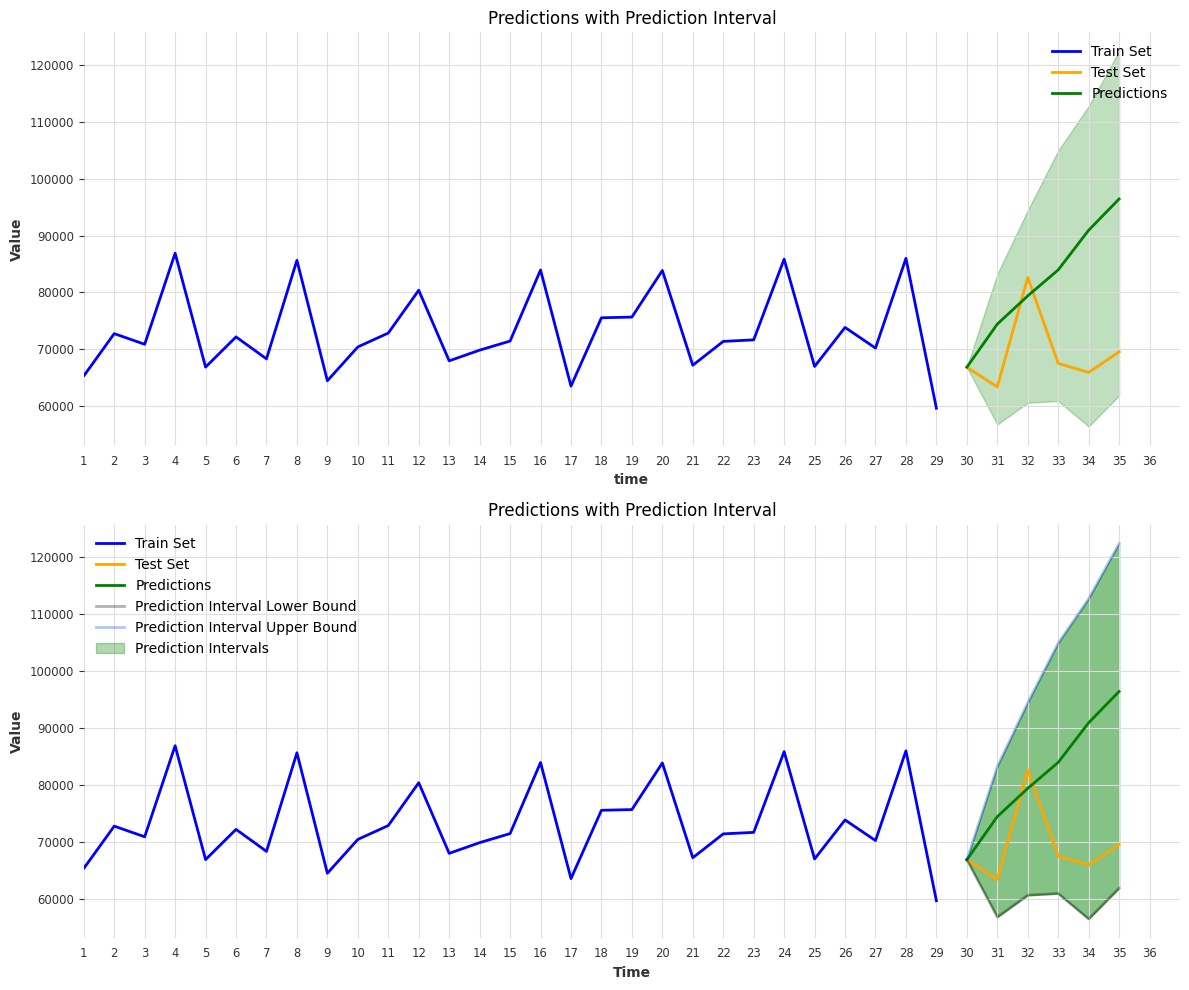

In [ ]:
# Function to plot the prediction results
def plot_darts_series(train_set, test_set, pred, component_idx=0, pred_intervals=None):
    """
    Plot the training set, test set, and predictions with and without prediction intervals.

    Parameters:
    ----------
    train_set : TimeSeries
        The training set.
    test_set : TimeSeries
        The test set.
    pred : TimeSeries
        The predictions.
    component_idx : int
        The index of the component to plot. Default is 0.
    pred_intervals : tuple of TimeSeries, optional
        A tuple containing the lower and upper bounds of the prediction intervals.
    """
    # Get univariate components for each TimeSeries
    train_target = train_set.univariate_component(component_idx)
    test_target = test_set.univariate_component(component_idx)
    pred_target = pred.univariate_component(component_idx)

    # Determine the correct range for x-ticks
    total_length = len(train_target) + len(test_target)
    x_ticks = np.arange(1, total_length + 1)

    # Create subplots
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    # Plot training set, test set, and predictions
    train_target.plot(ax=axs[0], label='Train Set', color='blue', new_plot=False)
    test_target.plot(ax=axs[0], label='Test Set', color='orange', new_plot=False)
    pred_target.plot(ax=axs[0], label='Predictions', color='green', new_plot=False)
    axs[0].set_title('Predictions with Prediction Interval')
    axs[0].set_ylabel('Value')
    axs[0].legend()

    # Set x-ticks to represent the actual time steps
    axs[0].set_xticks(x_ticks)
    axs[0].set_xlim([1, total_length + 1])
    print("\n")

    if pred_intervals is not None:
        lower_interval, upper_interval = pred_intervals
        lower_interval_target = lower_interval.univariate_component(component_idx)
        upper_interval_target = upper_interval.univariate_component(component_idx)

        # Plot training data, test data, predictions with prediction intervals
        train_target.plot(ax=axs[1], label='Train Set', color='blue', new_plot=False)
        test_target.plot(ax=axs[1], label='Test Set', color='orange', new_plot=False)
        pred_target.plot(ax=axs[1], label='Predictions', color='green', new_plot=False)
        lower_interval_target.plot(ax=axs[1], central_quantile=0.05, low_quantile=0.05, high_quantile=0.95, alpha=0.3, label='Prediction Interval Lower Bound', new_plot=False)
        upper_interval_target.plot(ax=axs[1], central_quantile=0.95, low_quantile=0.05, high_quantile=0.95, alpha=0.3, label='Prediction Interval Upper Bound', new_plot=False)

        # Fill between the intervals
        axs[1].fill_between(pred_target.time_index, lower_interval_target.pd_dataframe().values.flatten(), upper_interval_target.pd_dataframe().values.flatten(), color='green', alpha=0.3, label='Prediction Intervals')

        axs[1].set_title('Predictions with Prediction Interval')
        axs[1].set_ylabel('Value')
        axs[1].legend()

    # Set x-ticks to represent the actual time steps
    axs[1].set_xticks(x_ticks)
    axs[1].set_xlim([1, total_length + 1])

    axs[1].set_xlabel('Time')
    plt.tight_layout()
    plt.show()

# Use the function
plot_darts_series(
    train_set=train_target,
    test_set=test_target,
    pred=pred_samples_inv,
    pred_intervals=(pred_samples_inv.quantile(0.05), pred_samples_inv.quantile(0.95))
)

# Metrics

In [ ]:
from darts.metrics import mse, rmse, mae, mape, smape, mase

# Create metrics DataFrame
metrics_df = pd.DataFrame(
    {
        "MSE": [mse(test_target, pred_inv)],
        "RMSE": [rmse(test_target, pred_inv)],
        "MAE": [mae(test_target, pred_inv)],
        "MAPE": [mape(test_target, pred_inv)],
        "sMAPE": [smape(test_target, pred_inv)],
        "MASE": [mase(test_target, pred_inv, train_target)],
    },
    index=["Metrics"]
).T
display(metrics_df)

Metrics
MSE    4.375858e+08
RMSE   2.091855e+04
MAE    1.620238e+04
MAPE   2.405190e+01
sMAPE  2.011046e+01
MASE   1.545124e+00

# Backtesting

In [ ]:
from darts import concatenate

# Extract original target series
original_target_series = time_series_multiple.univariate_component(0)
display(original_target_series)

<TimeSeries (DataArray) (time: 36, component: 1, sample: 1)> Size: 288B
array([[[84503.]],

       [[65312.]],

       [[72753.]],

       [[70880.]],

       [[86893.]],

       [[66866.]],

       [[72182.]],

       [[68318.]],

       [[85651.]],

       [[64467.]],

...

       [[73840.]],

       [[70217.]],

       [[85992.]],

       [[59637.]],

       [[66846.]],

       [[63392.]],

       [[82637.]],

       [[67523.]],

       [[65938.]],

       [[69544.]]])
Coordinates:
  * time       (time) int64 288B 0 1 2 3 4 5 6 7 8 ... 28 29 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
# Concatenate transformed training and test sets
transformed_all_data = concatenate([transformed_train_set, transformed_test_set])
display(transformed_all_data)

<TimeSeries (DataArray) (time: 36, component: 4, sample: 1)> Size: 1kB
array([[[0.16398096],
        [0.02301721],
        [0.25297125],
        [0.83776301]],

       [[0.16398096],
        [0.02301721],
        [0.25297125],
        [0.83776301]],

       [[0.77357627],
        [0.61586834],
        [0.60301441],
        [0.80094131]],

       [[0.56038271],
        [0.50081237],
        [0.67771064],
        [0.27090255]],

...

       [[1.        ],
        [1.        ],
        [1.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [1.        ]],

       [[0.39375418],
        [0.43273236],
        [0.0104297 ],
        [0.96826149]],

       [[0.54483541],
        [0.45759323],
        [0.65748853],
        [0.53694931]]])
Coordinates:
  * time       (time) int64 288B 0 1 2 3 4 5 6 7 8 ... 28 29 30 31 32 33 34 35
  * component  (component) object 32B 'Total' 'Hol' 'VFR' 'Bus'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
# Initialize lists to hold the target and covariates
target_series = None
covariates = []

# Iterate over each component in the TimeSeries
for i in range(transformed_all_data.n_components):
    component = transformed_all_data.univariate_component(i)

    # Determine if the component is the target series
    if i == 0:  # First component is the target series
        target_series = component
    else:
        covariates.append(component)

In [ ]:
# Concatenate the covariates into a single TimeSeries
if len(covariates) > 0:
    past_covariates = concatenate(covariates, axis=1)
else:
    past_covariates = None  # Case where there are no covariates

# Display the target series and covariates
print("Target Series Type:", type(target_series))
display(target_series)

print("\nPast Covariates Type:", type(past_covariates))
if past_covariates is not None:
    display(past_covariates)
else:
    print("No covariates found.")

Target Series Type: <class 'darts.timeseries.TimeSeries'>


<TimeSeries (DataArray) (time: 36, component: 1, sample: 1)> Size: 288B
array([[[0.16398096]],

       [[0.16398096]],

       [[0.77357627]],

       [[0.56038271]],

       [[0.96978575]],

       [[0.14484527]],

       [[0.72493591]],

       [[0.51480956]],

       [[1.        ]],

       [[0.11836202]],

...

       [[0.76025453]],

       [[0.52032595]],

       [[0.96433803]],

       [[0.        ]],

       [[0.33935796]],

       [[0.33935796]],

       [[1.        ]],

       [[0.        ]],

       [[0.39375418]],

       [[0.54483541]]])
Coordinates:
  * time       (time) int64 288B 0 1 2 3 4 5 6 7 8 ... 28 29 30 31 32 33 34 35
  * component  (component) object 8B 'Total'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


Past Covariates Type: <class 'darts.timeseries.TimeSeries'>


<TimeSeries (DataArray) (time: 36, component: 3, sample: 1)> Size: 864B
array([[[0.02301721],
        [0.25297125],
        [0.83776301]],

       [[0.02301721],
        [0.25297125],
        [0.83776301]],

       [[0.61586834],
        [0.60301441],
        [0.80094131]],

       [[0.50081237],
        [0.67771064],
        [0.27090255]],

       [[0.97195812],
        [0.96341544],
        [0.35894241]],

...

       [[0.2764355 ],
        [0.36587401],
        [0.80104216]],

       [[1.        ],
        [1.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [1.        ]],

       [[0.43273236],
        [0.0104297 ],
        [0.96826149]],

       [[0.45759323],
        [0.65748853],
        [0.53694931]]])
Coordinates:
  * time       (time) int64 288B 0 1 2 3 4 5 6 7 8 ... 28 29 30 31 32 33 34 35
  * component  (component) object 24B 'Hol' 'VFR' 'Bus'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
# Perform backtesting with non-transformed data
backtest_results = hgb_proba_forecaster.backtest(
    series=original_target_series,
    num_samples=100,
    train_length=30,
    stride=1,
    retrain=True,
    metric=[mse, rmse, mae, mape, smape, mase],
    verbose=True
)

# Extract the results
mse_results = backtest_results[0]
rmse_results = backtest_results[1]
mae_results = backtest_results[2]
mape_results = backtest_results[3]
smape_results = backtest_results[4]
mase_results = backtest_results[5]

# Print the results
print("\n\nMSE Results:", mse_results)
print("RMSE Results:", rmse_results)
print("MAE Results:", mae_results)
print("MAPE Results:", mape_results)
print("sMAPE Results:", smape_results)
print("MASE Results:", mase_results)

100%|██████████| 6/6 [00:01<00:00,  4.38it/s]



MSE Results: 46604027.592577934
RMSE Results: 6231.875174982565
MAE Results: 6231.875174982565
MAPE Results: 8.84073373798468
sMAPE Results: 8.752732741146575
MASE Results: 0.6022156222402143


In [ ]:
# Perform backtesting with transformed data
backtest_results = hgb_proba_forecaster.backtest(
    series=target_series,
    num_samples=100,
    train_length=30,
    stride=1,
    retrain=True,
    metric=[mse, rmse, mae, mase],
    verbose=True
)

# Extract the results
mse_results = backtest_results[0]
rmse_results = backtest_results[1]
mae_results = backtest_results[2]
mase_results = backtest_results[3]

# Print the results
print("\n\nMSE Results:", mse_results)
print("RMSE Results:", rmse_results)
print("MAE Results:", mae_results)
print("MASE Results:", mase_results)

100%|██████████| 6/6 [00:01<00:00,  4.54it/s]



MSE Results: 0.1152336642131556
RMSE Results: 0.3088541502123245
MAE Results: 0.3088541502123245
MASE Results: 0.7266888170428697


# Explainability

In [ ]:
# List of components
components_list = list(train_set.columns)
print(components_list)

['Total', 'Hol', 'VFR', 'Bus']


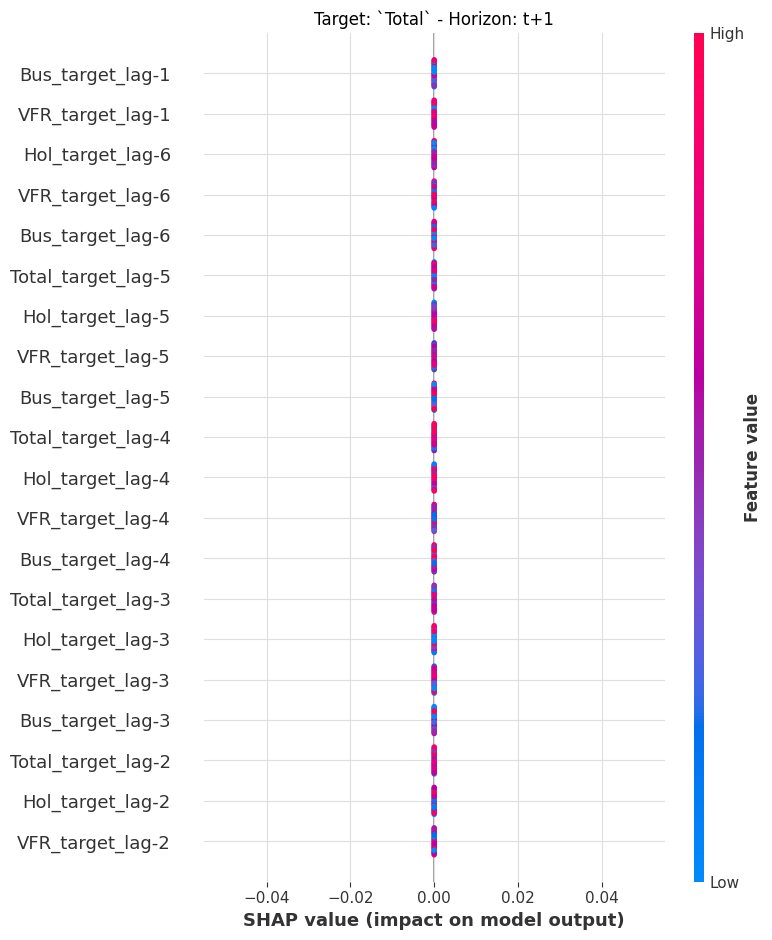

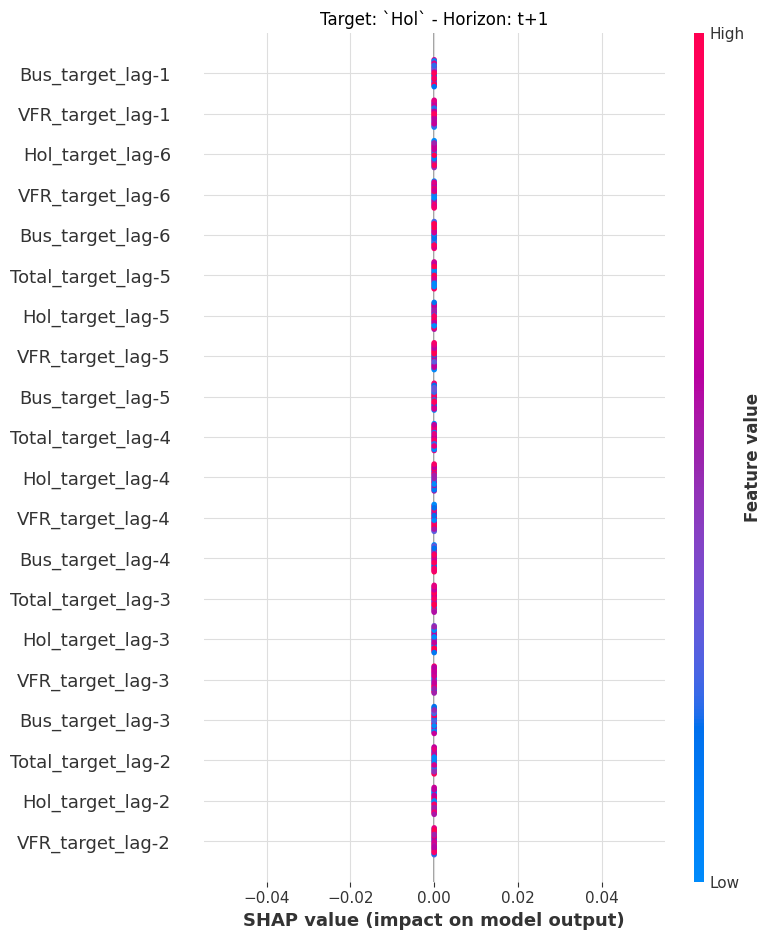

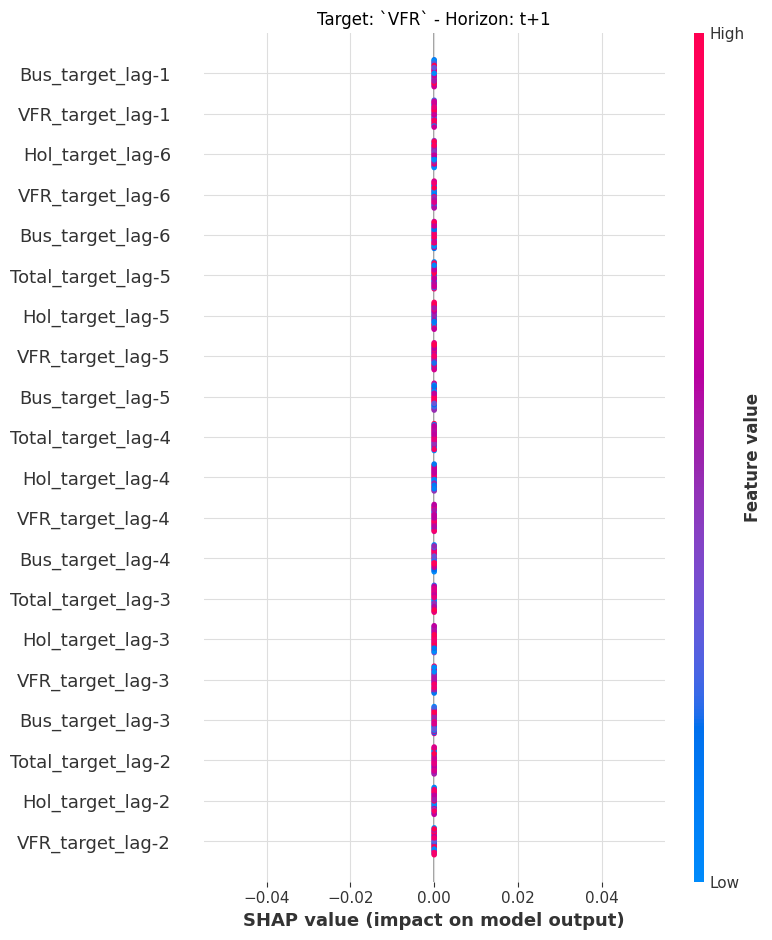

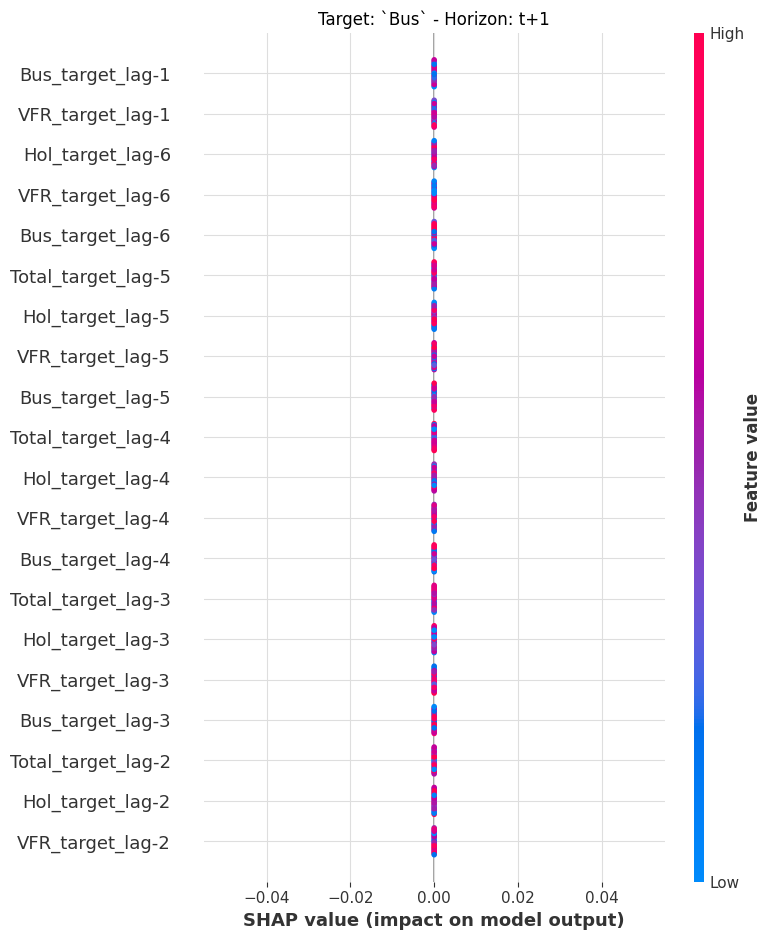

In [ ]:
import shap
shap.initjs()

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from darts.explainability.shap_explainer import ShapExplainer

# Initialize the SHAP explainer
shap_explain = ShapExplainer(hgb_proba_forecaster, background_series=transformed_train_set)

# Generate explanations
explain_results = shap_explain.explain(foreground_series=transformed_test_set)

# Plot a summary of SHAP explanations
shap_explain.summary_plot(
    target_components=train_set.components
)

# Plot a SHAP force plot for the first horizon
shap_explain.force_plot_from_ts(
    target_component='Total',
    foreground_series=transformed_test_set,
    horizon=1
)